## 보행자 설문

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

from wordcloud import WordCloud
from konlpy.tag import Twitter
from ckonlpy.tag import Twitter
from collections import Counter
from PIL import Image

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

### Data Load

In [4]:
path = ("C:/Users/user/Desktop/플젝용_데이터/설문조사/")
df_보행자 = pd.read_csv(path + "보행자_최종본.csv", encoding = 'CP949')
print(df_보행자.shape)
print(df_보행자.columns)
df_보행자.head(3)

(119, 22)
Index(['Unnamed: 0', '성별', '연령', '몇일외출', '보행시간', '외출목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM이용도로', 'PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유', '전용도로위치',
       '전용도로위치_이유', '추가의견'],
      dtype='object')


,Unnamed: 0,성별,연령,몇일외출,보행시간,외출목적,PM사고,PM사고횟수,PM사고원인,PM사고위치,...,PM아차사고원인,PM아차사고위치,PM이용도로,PM이용도로_이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견
0,0,남자,27,5~6회,0 ~ 20분 미만,출퇴근,아니오,NaN,NaN,NaN,...,전동킥보드 사용자,보도(인도),차도,차도가 맞지,"도로/보도 환경 개선, 법 제도 개선(PM 정기점검 등)",찬성,"차도, 보도 따로 구분될 필요성이 있다고 생각합니다.",차도,속도가 느리다고는 하지만 20km/h 라는 최대속도가 있기에 인도는 적합하지 않습니다.,없습니다~
1,1,남자,25,매일,1시간 이상,출퇴근,아니오,NaN,NaN,NaN,...,전동킥보드 사용자,보도(인도),자전거 전용도로,인도는 사람이랑 부딪히고 차도도 위험해서,"도로/보도 환경 개선, 운영방식 개선(방치 PM 즉시수거 등)",찬성,"차도,인도 이외의 다닐 곳이 필요하다",잘 모르겠음,잘 모르겠음,없습니다
2,2,남자,25,매일,40~60분 미만,산책,아니오,NaN,NaN,NaN,...,NaN,NaN,차도,사람 다니는 길로 다녀서 위험하게 다니는 경우를 많이봄\n인도 길을 너무 많이 막음,"도로/보도 환경 개선, 운영방식 개선(방치 PM 즉시수거 등)",반대,.,차도,인도는 좁으니까,NaN


### 데이터 전처리

In [5]:
df_보행자['성별'].unique()

array(['남자', '여자'], dtype=object)

In [6]:
for col in df_보행자.columns:
    print(col, " : ", df_보행자[col].unique(),"\n")

Unnamed: 0  :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  85  86  87  88  89  90
  91  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 113 114 115 116 117 118 119 120 121 122] 

성별  :  ['남자' '여자'] 

연령  :  [27 25 20 23 22 24 30 26 28 31 32 29 33] 

몇일외출  :  ['5~6회' '매일' '3~4회' '1~2회' '1회 미만'] 

보행시간  :  ['0 ~ 20분 미만' '1시간 이상' '40~60분 미만' '20~40분 미만'] 

외출목적  :  ['출퇴근' '산책' '등하교' '정류장/지하철역 접근' '쇼핑/외출' '스터디'] 

PM사고  :  ['아니오' '예'] 

PM사고횟수  :  [nan  2.  1.] 

PM사고원인  :  [nan '전동킥보드 사용자' '보행자' '자전거 운전자'] 

PM사고위치  :  [nan '보도(인도)' '이면도로(골목길)'] 

PM아차사고  :  ['예' '아니오' nan] 

PM아차사고횟수  :  ['1' nan '10' '2' '3' '2번' '5번' '3번' '1번' '5' '2본'] 

PM아차사고원인  :  ['전동킥보드 사용자' nan '

In [7]:
df_보행자['연령'].unique()

array([27, 25, 20, 23, 22, 24, 30, 26, 28, 31, 32, 29, 33], dtype=int64)

In [8]:
df_보행자['몇일외출'].unique()

array(['5~6회', '매일', '3~4회', '1~2회', '1회 미만'], dtype=object)

In [9]:
df_보행자['보행시간'].unique()

array(['0 ~ 20분 미만', '1시간 이상', '40~60분 미만', '20~40분 미만'], dtype=object)

In [10]:
df_보행자['외출목적'].unique()

array(['출퇴근', '산책', '등하교', '정류장/지하철역 접근', '쇼핑/외출', '스터디'], dtype=object)

In [11]:
df_보행자.loc[df_보행자['외출목적'] == '출퇴근', '외출목적'] = '등하교(출퇴근)'
df_보행자.loc[df_보행자['외출목적'] == '등하교', '외출목적'] = '등하교(출퇴근)'
df_보행자.loc[df_보행자['외출목적'] == '산책', '외출목적'] = '쇼핑 및 볼일'
df_보행자.loc[df_보행자['외출목적'] == '쇼핑/외출', '외출목적'] = '쇼핑 및 볼일'
df_보행자.loc[df_보행자['외출목적'] == '스터디', '외출목적'] = '쇼핑 및 볼일'

In [12]:
df_보행자['PM사고'].unique()

array(['아니오', '예'], dtype=object)

In [13]:
df_보행자['PM사고횟수'].unique()

array([nan,  2.,  1.])

In [14]:
df_보행자['PM사고원인'].unique()

array([nan, '전동킥보드 사용자', '보행자', '자전거 운전자'], dtype=object)

In [15]:
df_보행자['PM사고위치'].unique()

array([nan, '보도(인도)', '이면도로(골목길)'], dtype=object)

In [16]:
df_보행자['PM아차사고'].unique()

array(['예', '아니오', nan], dtype=object)

In [17]:
df_보행자['PM아차사고횟수'].unique()

array(['1', nan, '10', '2', '3', '2번', '5번', '3번', '1번', '5', '2본'],
      dtype=object)

In [18]:
df_보행자['PM아차사고횟수'].value_counts()

1     14
2      7
3      5
1번     4
2번     2
3번     2
5      2
10     1
5번     1
2본     1
Name: PM아차사고횟수, dtype: int64

In [19]:
df_보행자.loc[df_보행자['PM아차사고횟수'] == '1번', 'PM아차사고횟수'] = "1"
df_보행자.loc[df_보행자['PM아차사고횟수'] == '2번', 'PM아차사고횟수'] = "2"
df_보행자.loc[df_보행자['PM아차사고횟수'] == '5번', 'PM아차사고횟수'] = "5"
df_보행자.loc[df_보행자['PM아차사고횟수'] == '2본', 'PM아차사고횟수'] = "2"
df_보행자.loc[df_보행자['PM아차사고횟수'] == '3번', 'PM아차사고횟수'] = "3"

In [20]:
df_보행자['PM아차사고횟수'].unique()

array(['1', nan, '10', '2', '3', '5'], dtype=object)

In [21]:
df_보행자['PM아차사고원인'].unique()

array(['전동킥보드 사용자', nan, '도로 상태 요인(시설물 혹은 노면 상태 불량 등)', '자동차 운전자'],
      dtype=object)

In [22]:
df_보행자['PM아차사고위치'].unique()

array(['보도(인도)', nan, '차도', '이면도로(골목길)'], dtype=object)

In [23]:
df_보행자['PM이용도로'].unique()

array(['차도', '자전거 전용도로', '보도(인도)', '이면도로(골목길)'], dtype=object)

In [24]:
df_보행자['PM개선사항'].unique()

array(['도로/보도 환경 개선, 법 제도 개선(PM 정기점검 등)',
       '도로/보도 환경 개선, 운영방식 개선(방치 PM 즉시수거 등)',
       '운영방식 개선(방치 PM 즉시수거 등), 대중교통 환승 연계', '사고시 보험문제 개선, 도로/보도 환경 개선',
       '도로/보도 환경 개선, 운행자의 운행수칙 숙지상태', '사고시 보험문제 개선, 법 제도 개선(PM 정기점검 등)',
       '사고시 보험문제 개선, 편리성 증대(헬멧 미착용 등)', '도로/보도 환경 개선, 편리성 증대(헬멧 미착용 등)',
       '운영방식 개선(방치 PM 즉시수거 등), 법 제도 개선(PM 정기점검 등)',
       '편리성 증대(헬멧 미착용 등), 법 제도 개선(PM 정기점검 등)', '사고시 보험문제 개선, 대중교통 환승 연계',
       '도로/보도 환경 개선, 대중교통 환승 연계', '사고시 보험문제 개선, 운영방식 개선(방치 PM 즉시수거 등)',
       '도로/보도 환경 개선, 편리성 증대(헬맷 미착용 등)', '사고시 보험 문제 개선, 도로/보도 환경 개선',
       '사고시 보험 문제 개선, 법 제도 개선(PM 정기점검 등)',
       '운영방식 개선 (방치 PM 즉시수거 등), 대중교통 환승 연계',
       '사고시 보험 문제 개선, 편리성 증대(헬맷 미착용 등)',
       '운영방식 개선 (방치 PM 즉시수거 등), 법 제도 개선(PM 정기점검 등)',
       '사고시 보험 문제 개선, 대중교통 환승 연계', '사고시 보험 문제 개선, 운영방식 개선 (방치 PM 즉시수거 등)',
       '도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)',
       '사고시 보험 문제  개선, 법 제도 개선(PM 정기점검 등)',
       '사고시 보험 문제 개선, 편리성 증대(헬멧 미착용 등)',
       '사고시 보험 문제 개선, 운영방식 개선(방치 PM 즉시수거

In [25]:
pm개선사항 = []
pm개선사항 = df_보행자['PM개선사항'].apply(lambda x : x.split(',')[0]).str.strip()
pm개선사항 = pd.DataFrame(pm개선사항.value_counts().reset_index())

pm개선사항1 = []
pm개선사항1 = df_보행자['PM개선사항'].apply(lambda x : x.split(',')[1]).str.strip()
pm개선사항1 = pd.DataFrame(pm개선사항1.value_counts().reset_index())

df_pm개선사항 = pd.merge(pm개선사항, pm개선사항1, how = 'outer')
df_pm개선사항 = df_pm개선사항.rename({'index': '목록'},axis = 'columns')
df_pm개선사항

,목록,PM개선사항
0,도로/보도 환경 개선,38
1,사고시 보험 문제 개선,36
2,사고시 보험문제 개선,35
3,운영방식 개선(방치 PM 즉시수거 등),4
4,운영방식 개선 (방치 PM 즉시수거 등),3
5,편리성 증대(헬멧 미착용 등),2
6,사고시 보험 문제 개선,1
7,도로/보도 환경 개선,45
8,법 제도 개선(PM 정기점검 등),37
9,운영방식 개선(방치 PM 즉시수거 등),10


In [26]:
df_pm개선사항.groupby('목록')['PM개선사항'].sum()

목록
대중교통 환승 연계                10
도로/보도 환경 개선               83
법 제도 개선(PM 정기점검 등)        37
사고시 보험 문제  개선              1
사고시 보험 문제 개선              36
사고시 보험문제 개선               35
운영방식 개선 (방치 PM 즉시수거 등)     5
운영방식 개선(방치 PM 즉시수거 등)     14
운행자의 운행수칙 숙지상태             2
편리성 증대(헬맷 미착용 등)           3
편리성 증대(헬멧 미착용 등)          12
Name: PM개선사항, dtype: int64

In [27]:
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선 (방치 PM 즉시수거 등)', '목록'] = '운영방식 개선(방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제 개선 ', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험 문제 개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험 문제  개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬맷 미착용 등)', '목록'] = '편리성 증대(헬멧 미착용 등)'

In [28]:
df_pm개선사항 = df_pm개선사항.groupby('목록')['PM개선사항'].sum()
df_pm개선사항

목록
대중교통 환승 연계               10
도로/보도 환경 개선              83
법 제도 개선(PM 정기점검 등)       37
사고시 보험문제 개선              72
운영방식 개선(방치 PM 즉시수거 등)    19
운행자의 운행수칙 숙지상태            2
편리성 증대(헬멧 미착용 등)         15
Name: PM개선사항, dtype: int64

In [29]:
df_보행자['PM전용도로찬/반'].unique()

array(['찬성', '반대'], dtype=object)

In [30]:
df_보행자['전용도로위치'].unique()

array(['차도', '잘 모르겠음', '보도(인도)', '자전거 전용도로'], dtype=object)

### 문항별 빈도분석

### 1.보행자 인적사항
#### 1-1. 귀하의 성별은?

In [31]:
df_보행자['빈도 수'] = 1
성별 = pd.DataFrame(df_보행자.groupby('성별')['빈도 수'].count())
성별['비율'] = 성별['빈도 수'] / sum(성별['빈도 수']) * 100
성별

,빈도 수,비율
성별,,
남자,63,52.941176
여자,56,47.058824


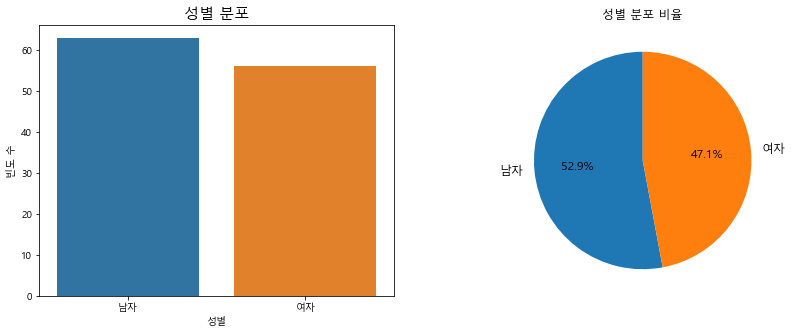

In [32]:
fig = plt.figure(figsize = (14, 5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=성별.index, y= '빈도 수', data = 성별)
ax1 = plt.title('성별 분포', fontsize = 15)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(성별['비율'], labels = 성별.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)
ax2 = plt.title('성별 분포 비율')

* 보행자 중 남자는 52%, 여자는 48%로 분포해 있음.

#### 1-2. 귀하의 연령은?

In [33]:
df_보행자['연령'].describe()

count    119.000000
mean      25.831933
std        3.012177
min       20.000000
25%       24.000000
50%       25.000000
75%       27.000000
max       33.000000
Name: 연령, dtype: float64

Text(0, 0.5, '인원 수')

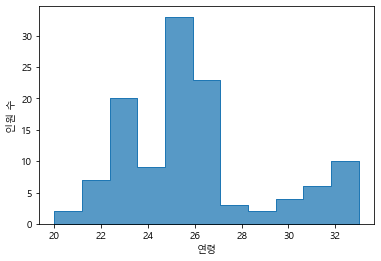

In [34]:
sns.histplot(df_보행자['연령'], element='step')
plt.ylabel('인원 수')

* 응답자의 연령의 평균은 25세, 최소값은 20세, 최대값은 33세로 분포해있음.

#### 1-3. 일주일에 몇 일 정도 외출하십니까?

In [35]:
몇일외출 = pd.DataFrame(df_보행자.groupby('몇일외출')['빈도 수'].count())
몇일외출['비율'] = 몇일외출['빈도 수'] / sum(몇일외출['빈도 수']) * 100
몇일외출 = 몇일외출.sort_values(by = '빈도 수',ascending=False)
몇일외출

,빈도 수,비율
몇일외출,,
5~6회,52,43.697479
매일,47,39.495798
3~4회,12,10.084034
1~2회,6,5.042017
1회 미만,2,1.680672


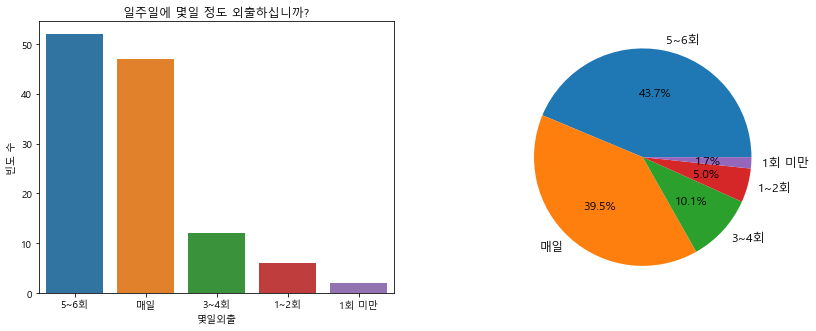

In [36]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= 몇일외출.index, y='빈도 수', data=몇일외출)
ax1 = plt.title('일주일에 몇일 정도 외출하십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(몇일외출['비율'], labels = 몇일외출.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, explode= [0, 0, 0, 0, 0])

* 보행자중 80% 이상은 일주일에 5회이상 외출한다고 응답하였음

#### 1-4. 하루에 몇 분 정도 보행하십니까?

In [37]:
df_보행자['보행시간'].unique()

array(['0 ~ 20분 미만', '1시간 이상', '40~60분 미만', '20~40분 미만'], dtype=object)

In [38]:
보행시간 = pd.DataFrame(df_보행자.groupby('보행시간')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
보행시간['비율'] = 보행시간['빈도 수'] / sum(보행시간['빈도 수']) * 100
보행시간

,빈도 수,비율
보행시간,,
20~40분 미만,55,46.218487
1시간 이상,28,23.529412
40~60분 미만,24,20.168067
0 ~ 20분 미만,12,10.084034


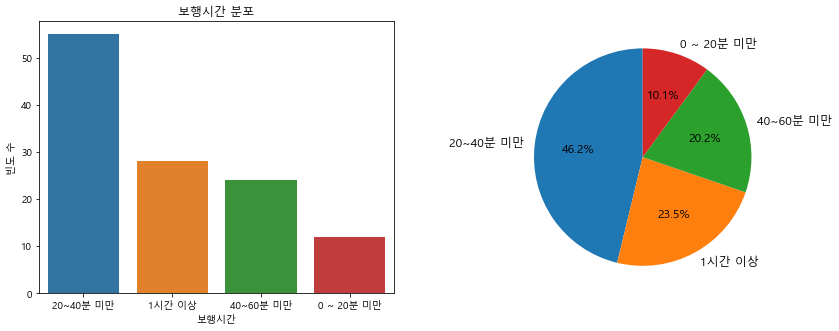

In [39]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=보행시간.index, y = '빈도 수', data = 보행시간)
ax1 = plt.title('보행시간 분포')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(x = 보행시간['비율'], labels = 보행시간.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90, explode= [0.0, 0, 0, 0])

* 응답자 중 44.7%가 하루에 20분 이상 40분 미만 보행한다고 응답하였음.

#### 1-5. 귀하께서 주로 외출하시는 목적은 무엇입니까?

In [40]:
외출목적 = pd.DataFrame(df_보행자.groupby('외출목적')['빈도 수'].count())
외출목적['비율'] = 외출목적['빈도 수'] / sum(외출목적['빈도 수']) * 100 
외출목적

,빈도 수,비율
외출목적,,
등하교(출퇴근),88,73.949580
쇼핑 및 볼일,25,21.008403
정류장/지하철역 접근,6,5.042017


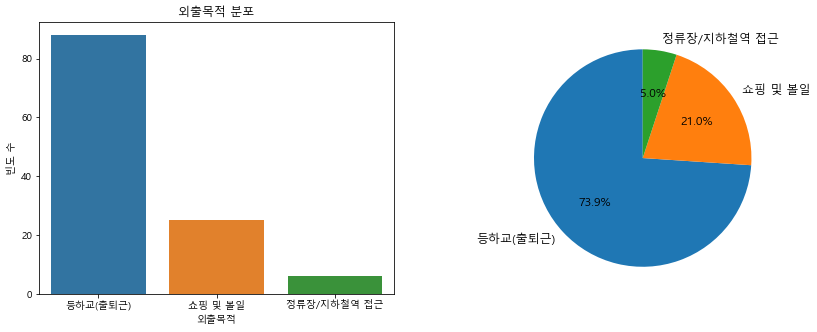

In [41]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=외출목적.index, y = '빈도 수', data = 외출목적)
ax1 = plt.title('외출목적 분포')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(x = 외출목적['비율'], labels = 외출목적.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90, explode= [0, 0, 0])

* 응답자 중 74.0%가 등하교(출퇴근)을 목적으로 외출한다고 응답하였음.

### 2. PM 사고 관련 문항
#### 2-1. 보행 중에, PM과 사고가 난 경험이 있습니까? 

In [42]:
pm사고 = pd.DataFrame(df_보행자.groupby('PM사고')['빈도 수'].count())
pm사고['비율'] = pm사고['빈도 수'] / sum(pm사고['빈도 수']) * 100
pm사고

,빈도 수,비율
PM사고,,
아니오,113,94.957983
예,6,5.042017


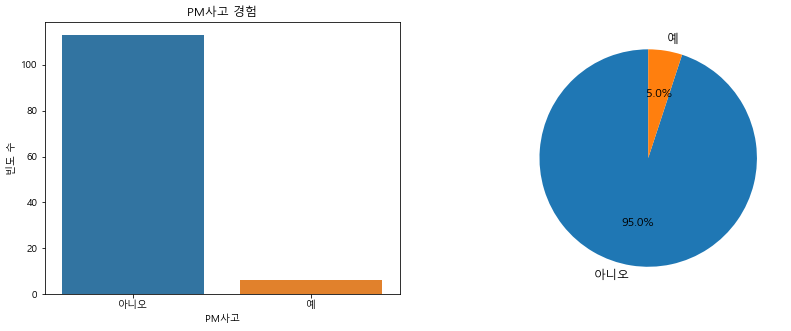

In [43]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=pm사고.index, y= '빈도 수',data=pm사고)
ax1 = plt.title('PM사고 경험')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고['비율'], labels = pm사고.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90, explode= [0, 0])

* 응답자 중 5.0%가 pm사고를 경험한 적이 있다고 응답하였음.

####   2-2. 보행 중에, PM과 사고가 난 경험은 몇 번 정도 입니까? 

In [44]:
df_보행자.columns

Index(['Unnamed: 0', '성별', '연령', '몇일외출', '보행시간', '외출목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM이용도로', 'PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유', '전용도로위치',
       '전용도로위치_이유', '추가의견', '빈도 수'],
      dtype='object')

In [45]:
pm사고횟수 = pd.DataFrame(df_보행자.groupby('PM사고횟수')['빈도 수'].count())
pm사고횟수['비율'] = pm사고횟수['빈도 수'] / sum(pm사고횟수['빈도 수']) * 100 
pm사고횟수

,빈도 수,비율
PM사고횟수,,
1.0,3,50.0
2.0,3,50.0


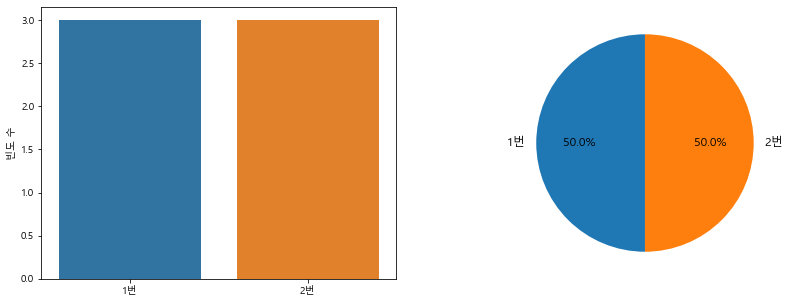

In [46]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['1번', '2번'], y= '빈도 수', data=pm사고횟수)


ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고횟수['비율'], labels = ['1번', '2번'],
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

####  2-3. 보행 중에, PM과 충돌이나 사고를 유발한 상대 혹은 원인은 무엇입니까?

In [47]:
pm사고원인 = pd.DataFrame(df_보행자.groupby('PM사고원인')['빈도 수'].count())
pm사고원인['비율'] = pm사고원인['빈도 수'] / sum(pm사고원인['빈도 수']) * 100
pm사고원인 = pm사고원인.sort_values(by='빈도 수', ascending = False)
pm사고원인

,빈도 수,비율
PM사고원인,,
전동킥보드 사용자,3,50.000000
자전거 운전자,2,33.333333
보행자,1,16.666667


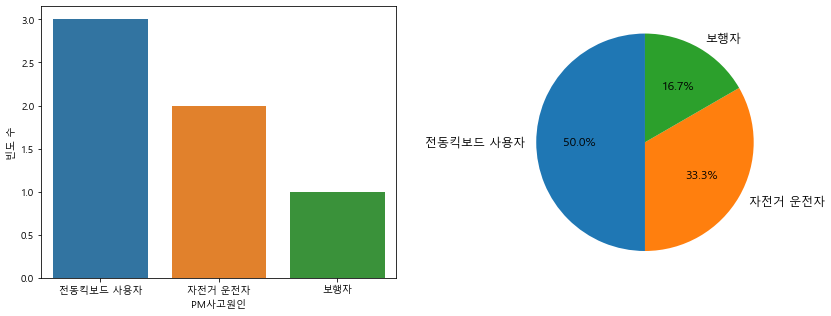

In [48]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= pm사고원인.index, y ='빈도 수', data=pm사고원인)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고원인['비율'], labels = pm사고원인.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90, explode= [0, 0,0])

* PM사고를 경험한 사람 중 사고원인에 대해서 50.0%는 전동킥보드 사용자라고 응답하였음

####  2-4. 보행 중에, PM과 사고가 난 위치는 어디입니까?

In [49]:
pm사고위치 = pd.DataFrame(df_보행자.groupby('PM사고위치')['빈도 수'].count())
pm사고위치['비율'] = pm사고위치['빈도 수'] / sum(pm사고위치['빈도 수']) * 100 
pm사고위치

,빈도 수,비율
PM사고위치,,
보도(인도),4,66.666667
이면도로(골목길),2,33.333333


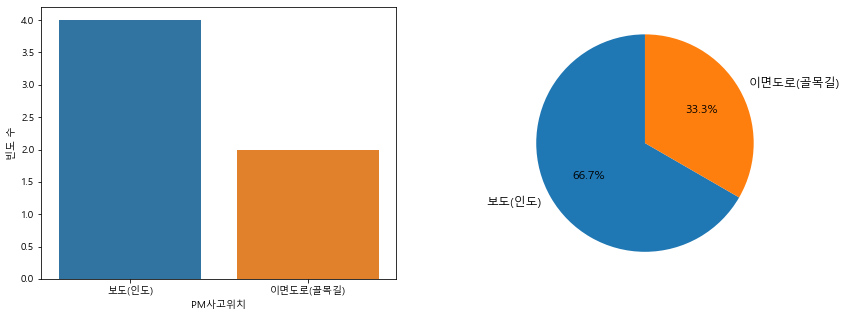

In [50]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = pm사고위치.index, y = '빈도 수', data = pm사고위치)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고위치['비율'],labels = pm사고위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 사고를 경험했다는 응답자 중 66.7%가 사고위치를 보도라고 응답하였음.

#### 2-5. 보행 중에, PM과 사고가 날 뻔 경험이 있습니까?

In [51]:
pm아차사고 = pd.DataFrame(df_보행자.groupby('PM아차사고')['빈도 수'].count())
pm아차사고['비율'] = pm아차사고['빈도 수'] / sum(pm아차사고['빈도 수']) * 100
pm아차사고

,빈도 수,비율
PM아차사고,,
아니오,79,66.949153
예,39,33.050847


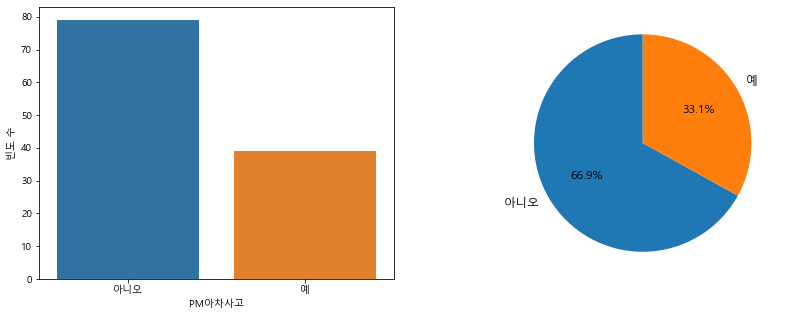

In [52]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = pm아차사고.index, y = '빈도 수', data = pm아차사고)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm아차사고['비율'],labels = pm아차사고.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 응답자 중 33.6%는 아차사고를 경험한 적이 있다고 응답하였음

####  2-6. 보행 중에, PM과 사고가 날 뻔한 경험은 몇 번 정도 입니까?  

<AxesSubplot:xlabel='PM아차사고횟수', ylabel='Count'>

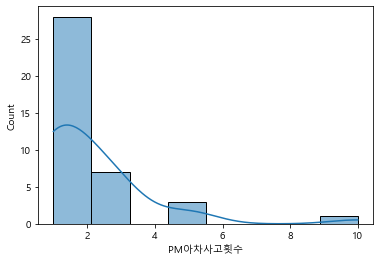

In [53]:
pm아차사고횟수 = df_보행자.loc[df_보행자['PM아차사고'] == '예']['PM아차사고횟수']
pm아차사고횟수 = pm아차사고횟수.astype(int)
sns.histplot(pm아차사고횟수, kde= True)


In [54]:
pm아차사고횟수 = pd.DataFrame(df_보행자.groupby('PM아차사고횟수')['빈도 수'].count())
pm아차사고횟수['비율'] = pm아차사고횟수['빈도 수'] / sum(pm아차사고횟수['빈도 수']) * 100 
pm아차사고횟수 = pm아차사고횟수.sort_values(by='빈도 수', ascending= False)
pm아차사고횟수

,빈도 수,비율
PM아차사고횟수,,
1,18,46.153846
2,10,25.641026
3,7,17.948718
5,3,7.692308
10,1,2.564103


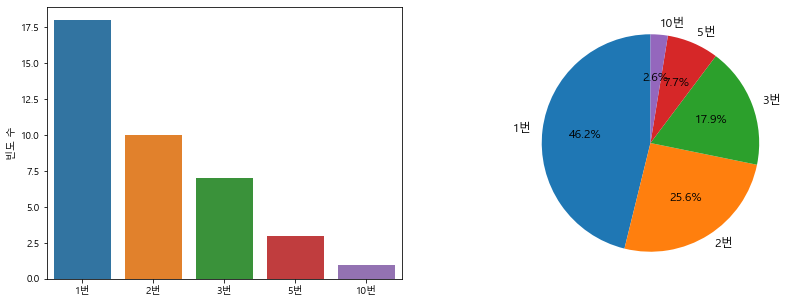

In [55]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = ['1번','2번','3번','5번','10번'], y = '빈도 수', data = pm아차사고횟수)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm아차사고횟수['비율'],labels = ['1번','2번','3번','5번','10번'],
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 아차사고를 경험한 사람 중 46.2%는 1번 경험하였다고 응답하였음

####  2-7. 보행 중에, PM과 충돌이나 사고를 유발할 뻔한 상대 혹은 원인은 무엇입니까?

In [56]:
pm아차사고원인 = pd.DataFrame(df_보행자.groupby('PM아차사고원인')['빈도 수'].count())
pm아차사고원인['비율'] = pm아차사고원인['빈도 수'] / sum(pm아차사고원인['빈도 수']) * 100 
pm아차사고원인 = pm아차사고원인.sort_values(by='빈도 수', ascending = False) 
pm아차사고원인

,빈도 수,비율
PM아차사고원인,,
전동킥보드 사용자,31,79.487179
도로 상태 요인(시설물 혹은 노면 상태 불량 등),4,10.256410
자동차 운전자,4,10.256410


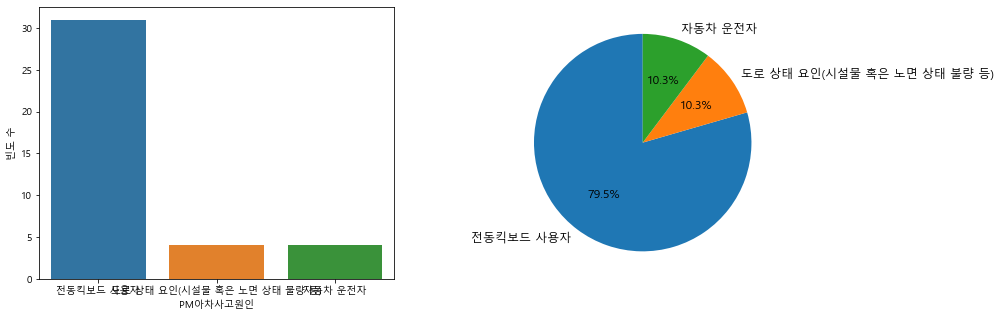

In [57]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = pm아차사고원인.index, y = '빈도 수', data = pm아차사고원인)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm아차사고원인['비율'],labels = pm아차사고원인.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 아차사고를 경험한 사람들 중 아차사고원인을 79.5%가 전동킥보드 사용자라고 응답함.

####  2-8. 보행 중에, PM과 사고가 날 뻔한 위치는 어디입니까?

In [58]:
pm아차사고위치 = pd.DataFrame(df_보행자.groupby('PM아차사고위치')['빈도 수'].count())
pm아차사고위치['비율'] = pm아차사고위치['빈도 수'] / sum(pm아차사고위치['빈도 수']) * 100 
pm아차사고위치 = pm아차사고위치.sort_values(by='빈도 수', ascending = False) 
pm아차사고위치

,빈도 수,비율
PM아차사고위치,,
보도(인도),32,82.051282
차도,4,10.256410
이면도로(골목길),3,7.692308


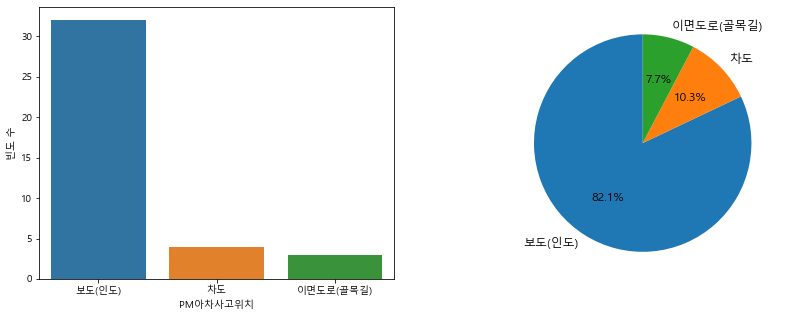

In [59]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = pm아차사고위치.index, y = '빈도 수', data = pm아차사고위치)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm아차사고위치['비율'],labels = pm아차사고위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 아차사고를 경험했다는 응답자 중 82.1%가 보도에서 아차사고를 경험했다고 응답하였음.

#### 사고 + 아차사고

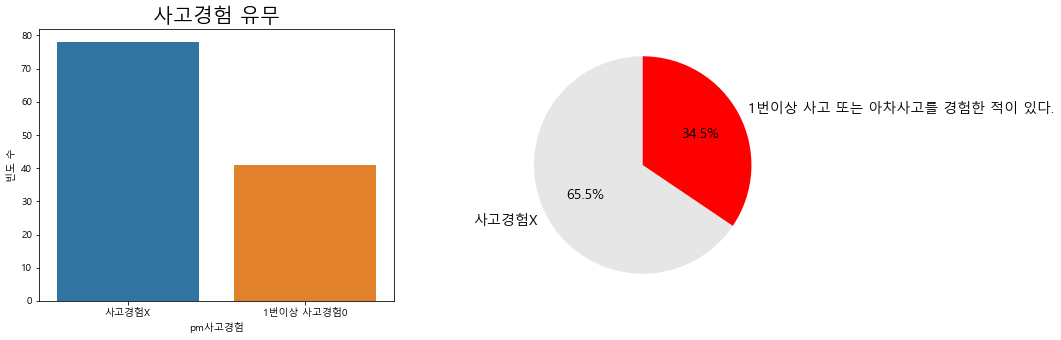

In [60]:
# 전체 사고 
df_보행자['pm사고경험'] = 0
df_보행자.loc[df_보행자['PM사고'] == "예", 'pm사고경험'] = 1
df_보행자.loc[df_보행자['PM아차사고'] == "예", 'pm사고경험'] = 1

pm사고경험 = pd.DataFrame(df_보행자.groupby('pm사고경험')['빈도 수'].count())
pm사고경험['비율'] = pm사고경험['빈도 수'] / sum(pm사고경험['빈도 수']) * 100 
pm사고경험

fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=pm사고경험.index, y = '빈도 수', data = pm사고경험)
ax1 = plt.xticks([0,1],['사고경험X', '1번이상 사고경험0'])
ax1 = plt.title('사고경험 유무', fontsize = 20)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고경험['비율'], autopct="%1.1f%%",
              labels = ['사고경험X', '1번이상 사고 또는 아차사고를 경험한 적이 있다.'], 
              colors = [(0.9, 0.9, 0.9), 'red'],
              textprops={'fontsize': 14}, startangle= 90)

* 설문에 참여한 보행자 중 37.4%는 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음

### 3. PM 통행 관련 문항

#### 3-1. 보행자 입장에서, PM은 어디로 통행하여야 한다고 생각하십니까?

In [61]:
이용도로 = pd.DataFrame(df_보행자.groupby('PM이용도로')['빈도 수'].count())
이용도로['비율'] = 이용도로['빈도 수'] / sum(이용도로['빈도 수']) * 100 
이용도로 = 이용도로.sort_values(by='빈도 수', ascending=False)
이용도로

,빈도 수,비율
PM이용도로,,
자전거 전용도로,53,44.537815
차도,45,37.815126
보도(인도),19,15.966387
이면도로(골목길),2,1.680672


In [62]:
colors = ['red','lightgrey','lightgrey','lightgrey']

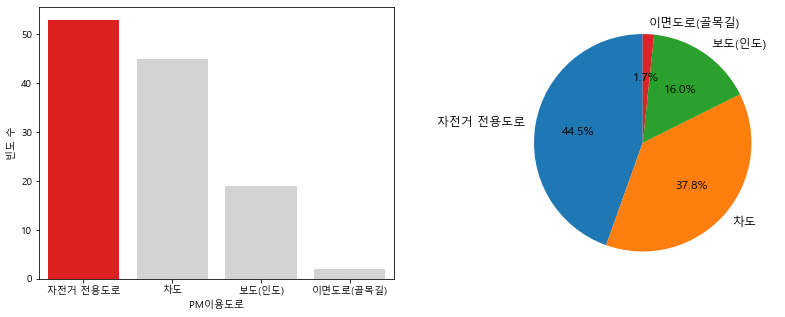

In [63]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 이용도로.index, y = '빈도 수', data = 이용도로, palette= colors)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(이용도로['비율'],labels = 이용도로.index,
             autopct="%1.1f%%", textprops={'fontsize': 12},
             startangle=90)

* 보행자 중 44.5% PM이 자전거도로로, 37.8%는 차도로 다녀야한다고 응답하였음

#### 3-2. 3-1문항에서 체크한 곳이라고 생각하시는 이유를 작성해주십시오.

In [64]:
자전거전용 = df_보행자.loc[df_보행자['PM이용도로'] == '자전거 전용도로']['PM이용도로_이유']
차도 = df_보행자.loc[df_보행자['PM이용도로'] == '차도']['PM이용도로_이유']
보도 = df_보행자.loc[df_보행자['PM이용도로'] == '보도(인도)']['PM이용도로_이유']
이면도로 = df_보행자.loc[df_보행자['PM이용도로'] == '이면도로(골목길)']['PM이용도로_이유']

In [65]:
보행자_mask = np.array(Image.open("C:/Users/user/Desktop/WordCloud 마스크/보행자4.png"))

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


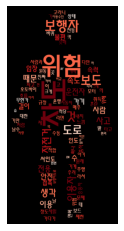

In [66]:
# 자전거도로로 다녀야 한다 이유 시각화
text = 자전거전용
text =''.join(text)
name = "자전거전용"
colormap = "Reds"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

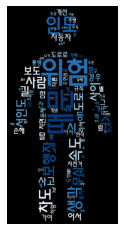

In [67]:
# 차도로 다녀야 한다 이유 시각화
text = 차도
text =''.join(text)
name = "차도"
colormap = "Blues"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

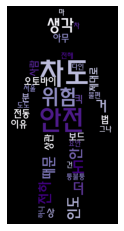

In [68]:
# 보도로 다녀야 한다 이유 시각화
text = 보도
text =''.join(text)
name = "보도"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

#### 3-3. 보행자 입장에서, PM 운행에 있어 개선할 사항이 있다면 체크해 주십시오. (2개)

In [69]:
개선사항 = pd.DataFrame(df_pm개선사항)
개선사항['비율'] = 개선사항['PM개선사항'] / sum(개선사항['PM개선사항']) * 100 
개선사항 = 개선사항.sort_values(by = 'PM개선사항', ascending = False)
개선사항

,PM개선사항,비율
목록,,
도로/보도 환경 개선,83,34.873950
사고시 보험문제 개선,72,30.252101
법 제도 개선(PM 정기점검 등),37,15.546218
운영방식 개선(방치 PM 즉시수거 등),19,7.983193
편리성 증대(헬멧 미착용 등),15,6.302521
대중교통 환승 연계,10,4.201681
운행자의 운행수칙 숙지상태,2,0.840336


In [70]:
colors = ['Blue','lightblue','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']

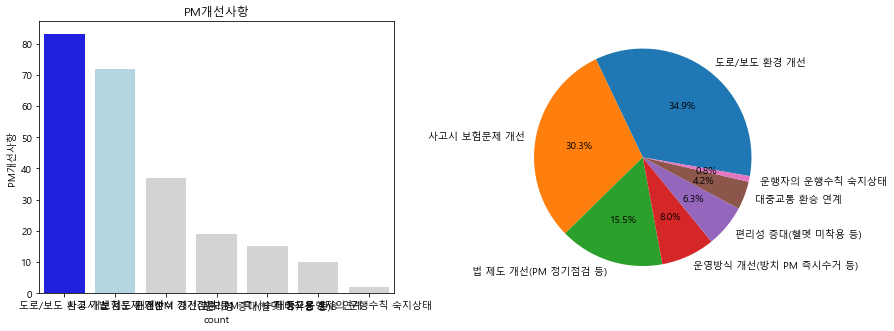

In [71]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 개선사항.index, y = 'PM개선사항',data = 개선사항, palette = colors)
ax1 = plt.title('PM개선사항')
ax1 = plt.xlabel('count')
ax1 = plt.ylabel('PM개선사항')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(개선사항['비율'],labels = 개선사항.index,
             autopct="%1.1f%%", textprops={'fontsize': 10},
             startangle=350)

* 보행자 중 PM개선사항에 대해서 34.9%는 도로/보도 환경개선을, 30.3%는 사고시 보험문제 개선 순으로 필요하다고 응답하였음

### 4. PM 통행 인프라 관련 문항
#### 4-1. 보행자 입장에서, PM 전용도로의 필요성에 대해서 어떻게 생각하십니까?

In [70]:
찬반 = pd.DataFrame(df_보행자.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
찬반['비율'] = 찬반['빈도 수'] / sum(찬반['빈도 수']) * 100
찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,78,65.546218
반대,41,34.453782


In [71]:
colors = ['red', 'lightgrey']

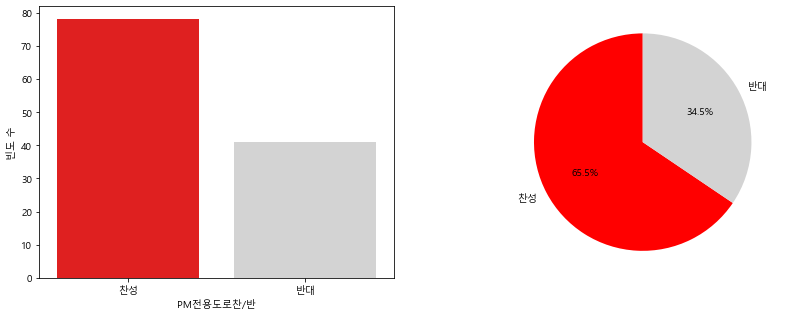

In [72]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 찬반.index, y = '빈도 수', data = 찬반, palette=colors)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(찬반['비율'],labels = 찬반.index,
             autopct="%1.1f%%", textprops={'fontsize': 10},colors = colors,
             startangle=90)

* 보행자 중 65.5%가 PM전용도로의 필요성에 대해서 찬성하였음

#### 4-2. 4-1번에서 선택한 의견의 이유를 적어주십시오. 

In [73]:
전용도로찬성 = df_보행자.loc[df_보행자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
전용도로반대 = df_보행자.loc[df_보행자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


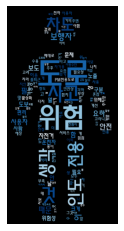

In [74]:
# 전용도로 찬성한다 이유 시각화
text = 전용도로찬성
text =''.join(text)
name = "전용도로찬성"
colormap = "Blues"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

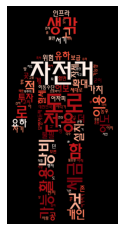

In [75]:
# 전용도로 반대한다 이유 시각화
text = 전용도로반대
text =''.join(text)
name = "전용도로반대"
colormap = "Reds"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

####  4-3. 만약 PM 전용도로를 설치한다면, 어느 위치에 설치하는 것이 합리적이라고 생각하십니까?

In [76]:
위치 = pd.DataFrame(df_보행자.groupby('전용도로위치')['빈도 수'].count())
위치['비율'] = 위치['빈도 수'] / sum(위치['빈도 수']) * 100 
위치 = 위치.sort_values(by='빈도 수', ascending = False)
위치

,빈도 수,비율
전용도로위치,,
차도,74,62.184874
보도(인도),38,31.932773
잘 모르겠음,4,3.361345
자전거 전용도로,3,2.521008


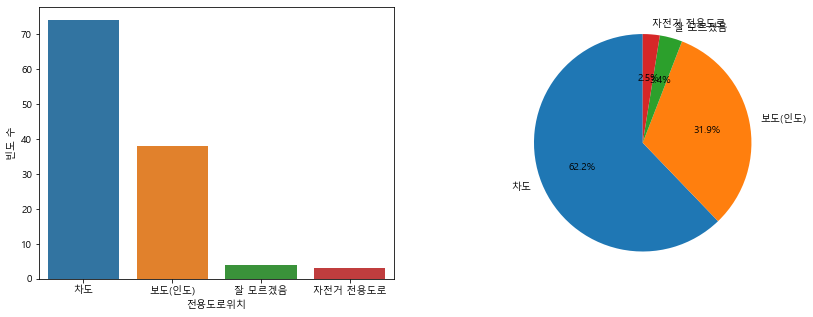

In [77]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=위치.index, y = '빈도 수', data = 위치)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(위치['비율'], labels = 위치.index, 
              autopct="%1.1f%%",
              startangle = 90)

* 보행자 중 62.2%가 PM전용도로 설치위치를 차도에 설치하여야 한다고 응답하였음.

In [78]:
df_보행자.columns

Index(['Unnamed: 0', '성별', '연령', '몇일외출', '보행시간', '외출목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM이용도로', 'PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유', '전용도로위치',
       '전용도로위치_이유', '추가의견', '빈도 수', 'pm사고경험'],
      dtype='object')

####  4-4. 4-3번에서 선택한 의견에 대한 이유를 적어주십시오.

In [79]:
위치보도 = df_보행자.loc[df_보행자['전용도로위치'] == '보도(인도)']['전용도로위치_이유']
위치차도 = df_보행자.loc[df_보행자['전용도로위치'] == '차도']['전용도로위치_이유']

In [87]:
text = 위치보도
text =''.join(text)
text

'그나마 설치한다면 가장 유력할듯 하다. 자전거 도로처럼 보도 옆에 설치하면 될 것 같아서PM을 차로 분류하기에는 속도와 안전성 면에서  뒤떨어지기 때문현재 자리 잡고있는 차도를 줄여 만들면 교통이 불편해지지않을까 라는 생각이 듦ㅇ.차도는 위험하다고 생각합니다.차도는위험보도쪽으로 설치를해놓으면좋을것 같아서자전거도로같은 개념으로차도를 고치는건 더 어려워보이네요자동차와 사고난다면 인명피해로 커지기때문엥위 답변과 일치차도로 하면 또 위험함차도 이용 시 운전 미숙 등으로 사고가 발생할 경우 이용자의 부상 정도가 클 것임.차도랑 속력차이가 너무 남차도는 너무 과함차도로 다니기엔 위험하다차도는 너무위험하기때문차도도 부족하다자전거 전용도로처럼 만들면 사고 위험도 적다고생각함인도가 넓고 차도가 좁은 길이 있고 차도가 넓고 인도가 좁은 길이 있으니까차도 보다 안전할거 같아서차도는 너무 과함차량 통행 방해그나마 설치한다면 가장 유력할듯 하다. 자전거 도로처럼 보도 옆에 설치하면 될 것 같아서PM을 차로 분류하기에는 속도와 안전성 면에서  뒤떨어지기 때문현재 자리 잡고있는 차도를 줄여 만들면 교통이 불편해지지않을까 라는 생각이 듦ㅇ.차도는 위험하다고 생각합니다.차도는위험보도쪽으로 설치를해놓으면좋을것 같아서자전거도로같은 개념으로차도를 고치는건 더 어려워보이네요위 답변과 일치차도로 하면 또 위험함'

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


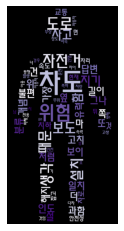

In [80]:
# 보도에 설치해야한다 이유 시각화
text = 위치보도
text =''.join(text)
name = "위치보도"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


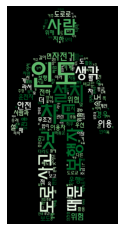

In [86]:
# 차도로 다녀야 한다 이유 시각화
text = 위치차도
text =''.join(text)
name = "위치차도"
colormap = "Greens"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

In [89]:
text = 위치차도
text =''.join(text)
text

'속도가 느리다고는 하지만 20km/h 라는 최대속도가 있기에 인도는 적합하지 않습니다.인도는 좁으니까보행자의 안전을 위해 차도에 설치하는 것이 맞다고 생각한다.안전PM 의 속도가 매우 빠르므로 현재 시골에서 거주중인데 인도의 폭이 좁다. 더 이상 할애해줄수 있는 공간이 없다. \n불법주정차하는 차들을 빼서 전용도로로 만들어야한다고 생각한다.빨라서.아무래도 보행하는데 위험할 것 같으니 차도에 설치하자바퀴달린거니꺼사람먼저인도는 무조건 사람만1,2차선만 있는 도로가 아니면 차도로 전용도로를 설치하는게 안전성 문제에서 더 낫다고 생각함사람에게 위협을 줄 수 있기때문에만일 인도에 설치해 사람과 사고나면 보행자가 많이 다친다. 차도에 설치해서 차와 사고날 경우 PM이용자가 보호대를 잘 차고 이용안내를 잘 따랐다면 경미한 상처를 입지만 잘 따르지 않고 멋대로 행동한다면 많이 다칠 것이다. 이것은 pm이용자에게 안전하게 이용할 수 있도록 만들고 pm는 자동차면허증이 없을 경우 이용이 불가능하므로 차도에 이용해야 한다.자전거도로로 인도는 충분인도는 사람.자전거 도로가 있기때문인도는 위험하기 때문에속도가 빨라서 인도는 어려움보행자 위협보행자 우선 탈 것이 인도를 돌아다니면 사람과 기계의 충돌로 위협적일 때가 빈번하다 생각합니다 차도에 설치해 차량운전자 pm운전자의 도로교통교육, 안전, 인식개선과 같은 여러 활동을 겸해 운영하는 것이 비교적 인도에서의 운행보다 안전하다 생각하기에 합리적이라 보고 있습니다너무빠름자동으로 움직여서너비가 좁은 보도의 경우 설치하기가 애매하고, 보도나 차도에 설치한다하더라도 보행자의 길은 좁히지(침범하지)않고 설치했으면 하는 바람이다.인도에서 조금만 이탈해도 사고 우려가 큼자전거 도로 활용사람의 안전이 최우선 차도 가에쪽에 자전거도로 표시해서 운행하면 좋을것 같습니다.\n인도에서 운행하여 사고의 위험성이 높기 때문입니다.인도는 사람이 걸어다니는 곳이므로 다른건 다니면 안돼요모터가 달린 기계다 보니 인도는 위험하다.자전거 도로처럼 다니기 편한 곳에 잘 

#### 5. PM (personal mobility) 전용도로 이외에 PM 통행과 관련하여 추가적인 의견이 있다면 기술해주십시오.

In [82]:
df_보행자['추가의견'].unique()

array(['없습니다~', '없습니다', nan,
       'PM에 대한 인식개선이 필요하다고 생각한다. 누구는 자전거와 비슷하다고 생각하며 또 다른 누군가는 오토바이와 비슷하다고 생각한다. 하지만 그 두 탈것은 확연히 다르다고 생각한다. 이 것에 대해 명확하지 않으면 서로의 생각자체가 다르기 때문에 사건 사고에 관해서 의견이 충돌하기 마련이다.\nPM 운전자들의 안전수칙에 대한 숙지가 필요하다고 생각한다. 신기한 사람들을 정말 많이봤다. 한명은 내리막길에서 풀악셀을 밟아 내려가다 돌부리에 걸려서 3M 정도 쓸린 사람을 봤고 또 한명은 차도에서 인도로 오는 갈림길을 주저없이 통화하면서 들어오다가 사고가 날뻔 했으며, 또 다른 한명은 겨울 골목길에서 핸드폰을 보며 주행하다가 갈림길에서 있는 나를 보고 브레이크가 아닌 악셀을 밟아 정면으로 들이 받을뻔 했다. 이렇듯 다양한 운전자들이 많은 가운데 정기적인 안전수칙 숙지 및 교육이 필요하다고 생각한다.',
       '안정장비 착용을 필수적으로 하지 않는 운전자가 있습니다 무조건적인 착용이 강력한 법안화 되었으면 좋겠습니다', '.',
       '없음', '헬맷 착용은 꼭 해야 한다고 생각합니다. ', '없음.', '없음 화이팅',
       '보다 명확한 법적 근거 마련 ',
       '근데 차보단 pm들이 환경적으로는 킹이라 많은 지원과 제도에 대해 관심을 가져주셨으면 좋겠습니다',
       'pm 이용시 교통법규,안전운전 등의 교육이 선행 되어야 한다고 생각함.',
       '필요한 부분에 대한 연구를 하고 계신 것 같습니다. 파이팅!',
       '전조등, 후미등 설치 필요. 그게 아니라면 운전자 조끼착용 의무화도 좋을듯 합니다', 'X',
       '저는 30대인데 써 본 일이 없어서 잘 답변이 되었는지 모르겠습니다. 제 친구들과 이야기를 해봐도 그렇고 30대 여성들은 거의 안 탈겁니다... 왜냐하면 이미 자동차를 소유했거나 차라리 택시를 탑니다... PM이 무엇인지 모르거나 

### 교차분석
#### 보행자 성별 - 사고 교차분석

In [83]:
보행남자 = df_보행자.loc[df_보행자['성별'] == '남자']
보행여자 = df_보행자.loc[df_보행자['성별'] == '여자']

In [84]:
남자사고 = pd.DataFrame(보행남자.groupby('pm사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
남자사고['비율'] = 남자사고['빈도 수'] / sum(남자사고['빈도 수']) * 100 

여자사고 = pd.DataFrame(보행여자.groupby('pm사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
여자사고['비율'] = 여자사고['빈도 수'] / sum(여자사고['빈도 수']) * 100 

NameError: name 'pm남자사고' is not defined

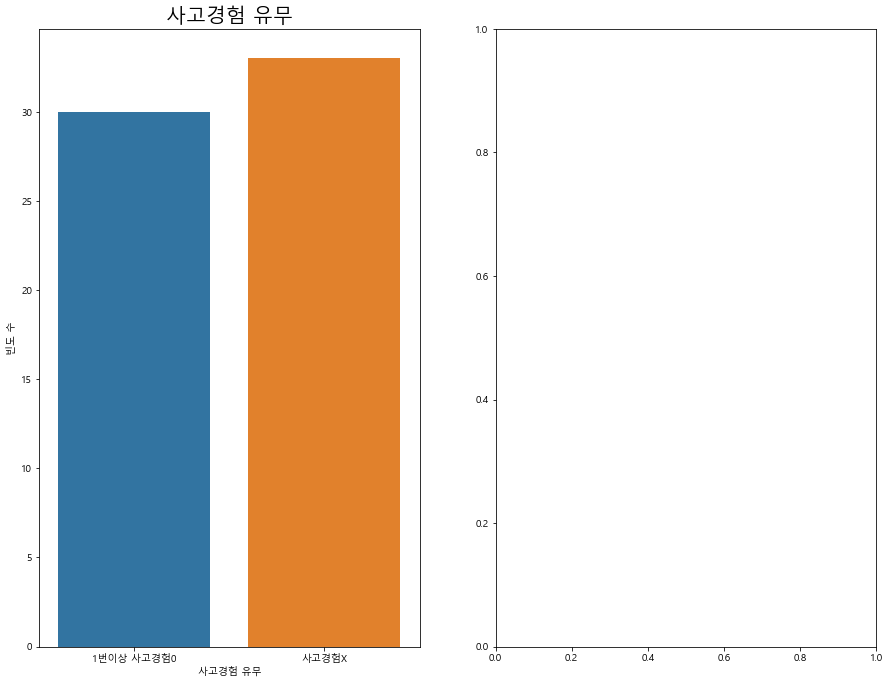

In [85]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 남자사고.index, y='빈도 수', data = 남자사고)
ax1 = plt.xticks([0,1] , ['1번이상 사고경험0','사고경험X'])
ax1 = plt.xlabel('사고경험 유무')
ax1 = plt.title('사고경험 유무', fontsize = 20)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(pm남자사고['비율'], autopct="%1.1f%%",
              labels = ['사고경험X','1번이상 사고경험0',],
              textprops={'fontsize': 14}, startangle= 300)

ax1 = fig.add_subplot(2,2,3)
ax1 = sns.barplot(x = 여자사고.index, y='빈도 수', data = 여자사고)
ax1 = plt.xticks([0,1],['사고경험X', '1번이상 사고경험0'])
ax1 = plt.xlabel('사고경험 유무')
ax1 = plt.title('사고경험 유무', fontsize = 20)

ax2 = fig.add_subplot(2,2,4)
ax2 = plt.pie(pm여자사고['비율'], autopct="%1.1f%%",
              labels = ['사고경험X', '1번이상 사고 또는 아차사고를 경험한 적이 있다.'],
              textprops={'fontsize': 14}, startangle= 90)

* 남자 보행자 중 53.1%는 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.
* 여자 보행자 중 37.4%는 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.

#### 보행자 성별 - PM전용도로찬/반 교차분석

In [90]:
보행남자찬반 = pd.DataFrame(보행남자.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
보행남자찬반['비율'] = 보행남자찬반['빈도 수'] / sum(보행남자찬반['빈도 수']) * 100 

보행여자찬반 = pd.DataFrame(보행여자.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
보행여자찬반['비율'] = 보행여자찬반['빈도 수'] / sum(보행여자찬반['빈도 수']) * 100

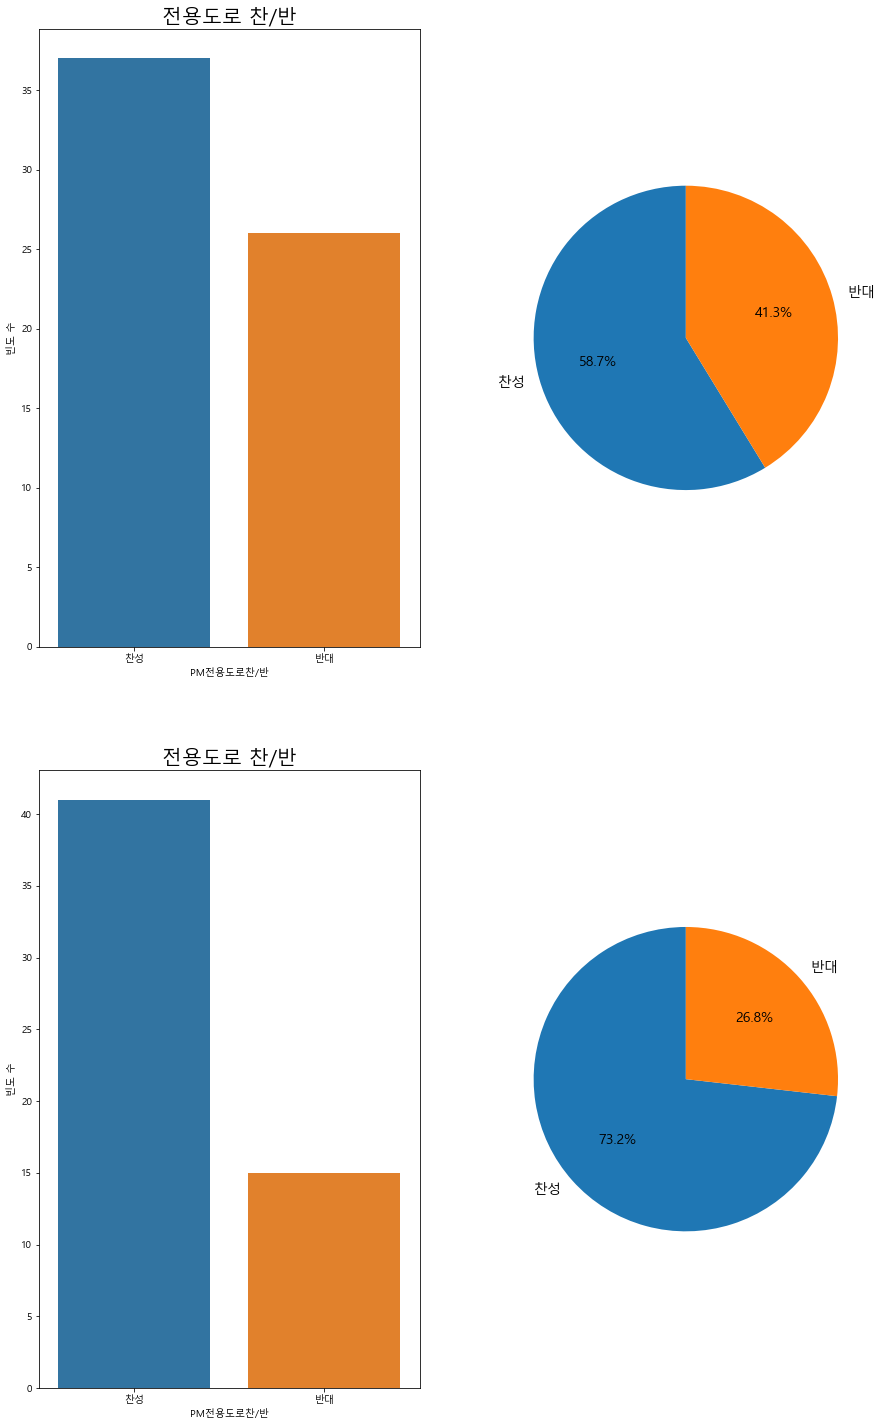

In [91]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x= 보행남자찬반.index, y='빈도 수', data = 보행남자찬반)
ax1 = plt.title('전용도로 찬/반', fontsize=20)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(보행남자찬반['비율'],autopct="%1.1f%%",
              labels = 보행남자찬반.index, textprops={'fontsize': 14}, startangle= 90)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x= 보행여자찬반.index, y='빈도 수', data = 보행여자찬반)
ax3 = plt.title('전용도로 찬/반', fontsize=20)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(보행여자찬반['비율'],autopct="%1.1f%%",
              labels = 보행여자찬반.index, textprops={'fontsize': 14}, startangle= 90)

* 남자 보행자 중 57.8%는 PM전용도로의 필요성에 대해 찬성한다고 응답하였음.
* 여자 보행자 중 71.2%는 PM전용도로의 필요성에 대해 찬성한다고 응답하였음.

####  보행자 성별 - 전용도로설치위치 교차분석

In [92]:
보행남자위치 = pd.DataFrame(보행남자.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
보행남자위치['비율'] = 보행남자위치['빈도 수'] / sum(보행남자위치['빈도 수']) * 100

보행여자위치 = pd.DataFrame(보행여자.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
보행여자위치['비율'] = 보행여자위치['빈도 수'] / sum(보행여자위치['빈도 수']) * 100

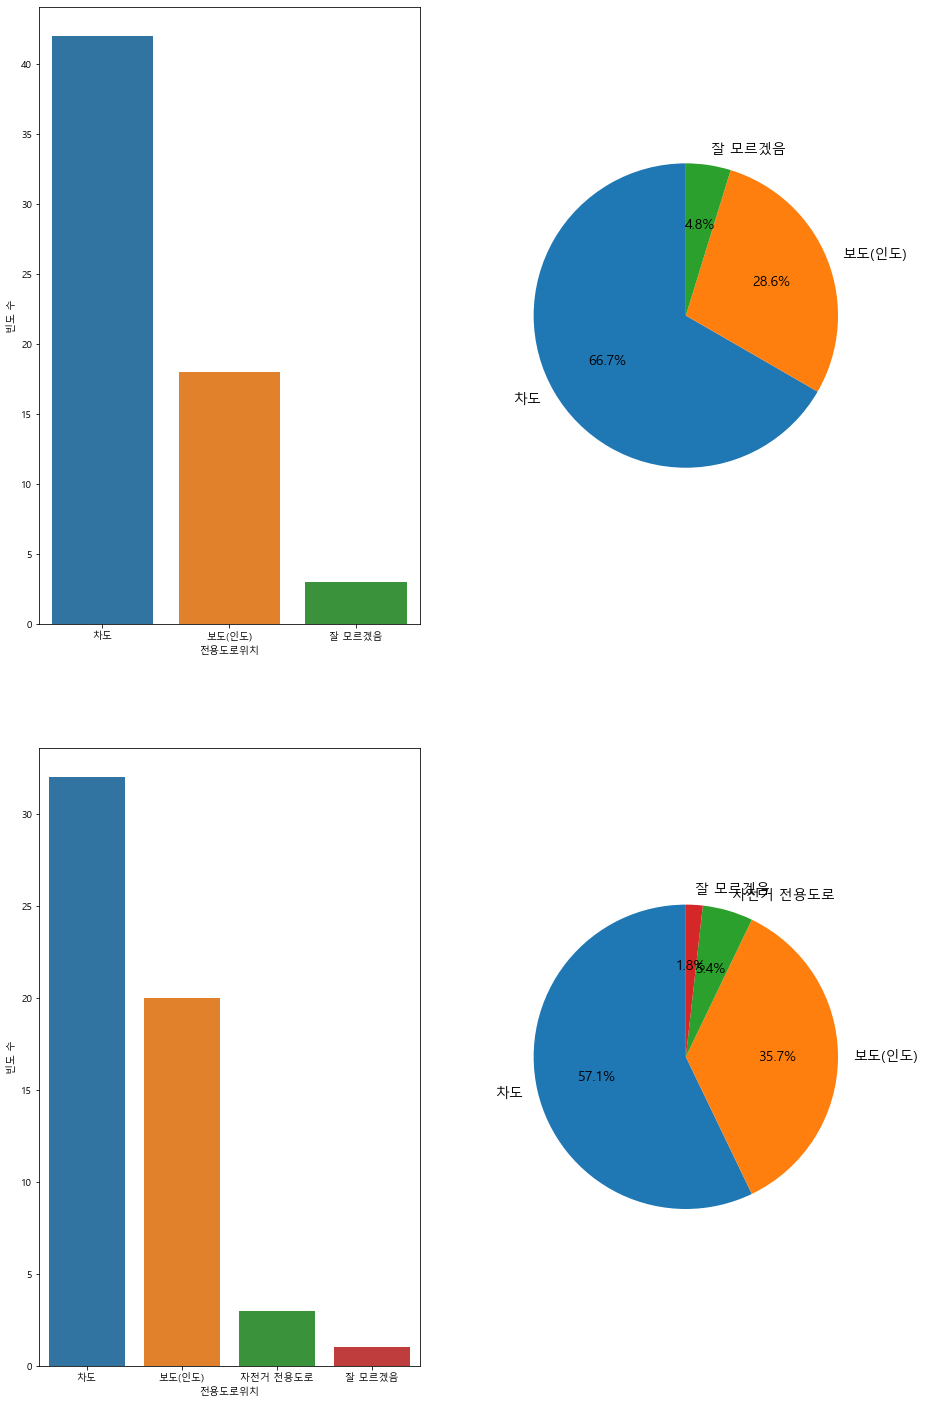

In [93]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x= 보행남자위치.index, y='빈도 수', data = 보행남자위치)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(보행남자위치['비율'],autopct="%1.1f%%",
              labels = 보행남자위치.index, textprops={'fontsize': 14}, startangle= 90)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x= 보행여자위치.index, y='빈도 수', data = 보행여자위치)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(보행여자위치['비율'],autopct="%1.1f%%",
              labels = 보행여자위치.index, textprops={'fontsize': 14}, startangle= 90)

#### 보행자 외출 횟수별 - 사고 교차분석 
* 값 별 갯수 차이가 많이 나서 3~4미만 값은 3~4미만으로 통합 

In [94]:
df_보행자.loc[df_보행자['몇일외출'] == '1회 미만', '몇일외출'] = '3~4회 이하'
df_보행자.loc[df_보행자['몇일외출'] == '1~2회', '몇일외출'] = '3~4회 이하'
df_보행자.loc[df_보행자['몇일외출'] == '3~4회', '몇일외출'] = '3~4회 이하'
df_보행자['몇일외출'].value_counts()

5~6회       52
매일         47
3~4회 이하    20
Name: 몇일외출, dtype: int64

In [95]:
외출34 = df_보행자.loc[df_보행자['몇일외출'] == '3~4회 이하']
외출56 = df_보행자.loc[df_보행자['몇일외출'] == '5~6회']
외출매일 = df_보행자.loc[df_보행자['몇일외출'] == '매일']

In [96]:
외출34사고 = pd.DataFrame(외출34.groupby('pm사고경험')['빈도 수'].count())
외출34사고['비율'] = 외출34사고['빈도 수'] / sum(외출34사고['빈도 수']) * 100 

외출56사고 = pd.DataFrame(외출56.groupby('pm사고경험')['빈도 수'].count())
외출56사고['비율'] = 외출56사고['빈도 수'] / sum(외출56사고['빈도 수']) * 100 

외출매일사고 = pd.DataFrame(외출매일.groupby('pm사고경험')['빈도 수'].count())
외출매일사고['비율'] = 외출매일사고['빈도 수'] / sum(외출매일사고['빈도 수']) * 100 

In [97]:
외출34사고

,빈도 수,비율
pm사고경험,,
0,10,50.0
1,10,50.0


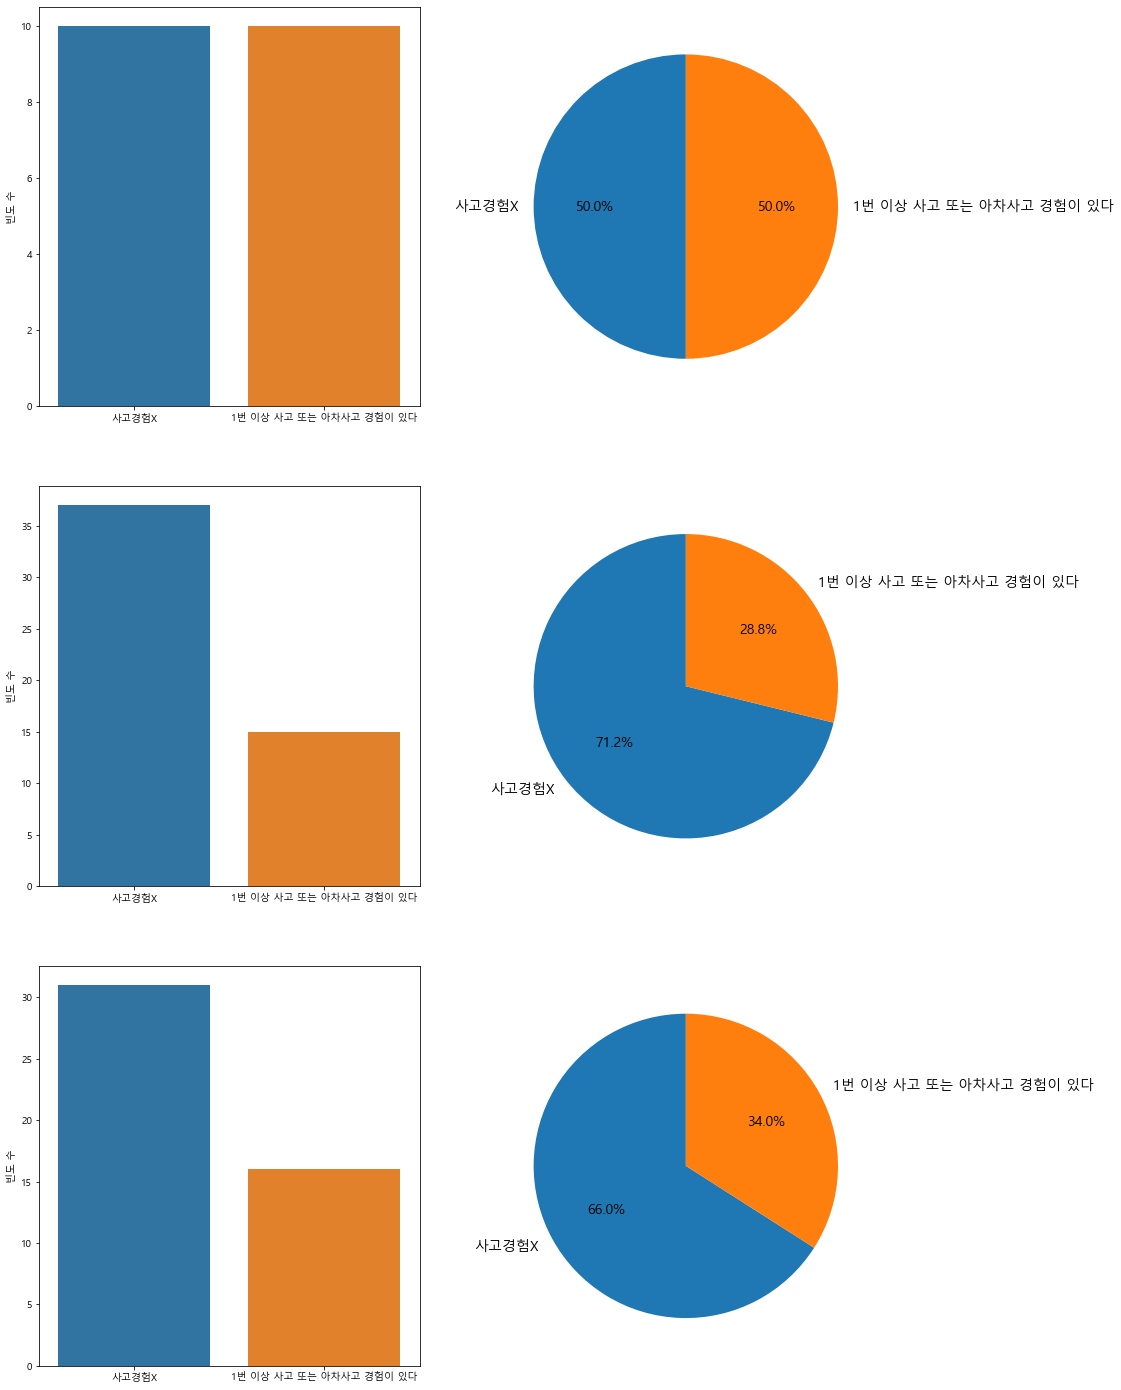

In [98]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(x= ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], y='빈도 수', data = 외출34사고)

ax2 = fig.add_subplot(3,2,2)
ax2 = plt.pie(외출34사고['비율'],autopct="%1.1f%%",
              labels = ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], textprops={'fontsize': 14}, startangle= 90)

ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(x= ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], y='빈도 수', data = 외출56사고)

ax4 = fig.add_subplot(3,2,4)
ax4 = plt.pie(외출56사고['비율'],autopct="%1.1f%%",
              labels = ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], textprops={'fontsize': 14}, startangle= 90)

ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(x= ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], y='빈도 수', data = 외출매일사고)

ax6 = fig.add_subplot(3,2,6)
ax6 = plt.pie(외출매일사고['비율'],autopct="%1.1f%%",
              labels = ['사고경험X', '1번 이상 사고 또는 아차사고 경험이 있다'], textprops={'fontsize': 14}, startangle= 90)


* 외출을 3~4회한다고 응답한 보행자 중 50.0% 는 1번 이상 사고 또는 아차사고 경험이 있다고 응답하였음
* 외출을 5~6회한다고 응답한 보행자 중 32.1% 는 1번 이상 사고 또는 아차사고 경험이 있다고 응답하였음
* 외출을 매일한다고 응답한 보행자 중 38.0% 는 1번 이상 사고 또는 아차사고 경험이 있다고 응답하였음

#### 보행자 외출 횟수별 - PM전용도로찬/반 교차분석 

In [99]:
외출34찬반 = pd.DataFrame(외출34.groupby('PM전용도로찬/반')['빈도 수'].sum())
외출34찬반['비율'] = 외출34찬반['빈도 수'] / sum(외출34찬반['빈도 수']) * 100 

외출56찬반 = pd.DataFrame(외출56.groupby('PM전용도로찬/반')['빈도 수'].sum())
외출56찬반['비율'] = 외출56찬반['빈도 수'] / sum(외출56찬반['빈도 수']) * 100 

외출매일찬반 = pd.DataFrame(외출매일.groupby('PM전용도로찬/반')['빈도 수'].sum())
외출매일찬반['비율'] = 외출매일찬반['빈도 수'] / sum(외출매일찬반['빈도 수']) * 100 

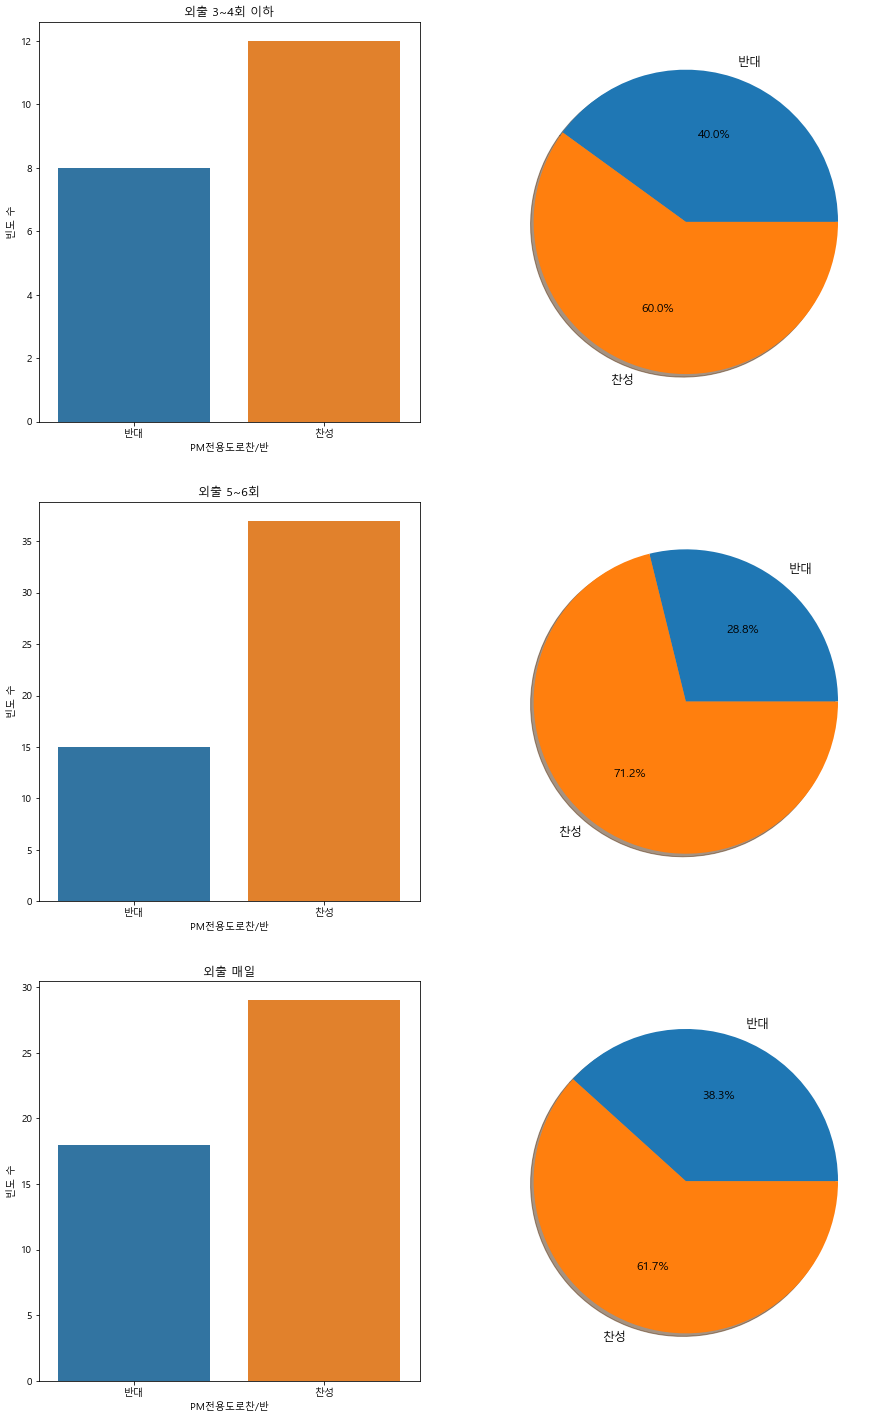

In [100]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(x=외출34찬반.index,y='빈도 수',data = 외출34찬반)
ax1 = plt.title('외출 3~4회 이하')

ax2 = fig.add_subplot(3,2,2)
ax2 = plt.pie(외출34찬반['비율'], labels = 외출34찬반.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)

ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(x=외출56찬반.index ,y='빈도 수', data = 외출56찬반)
ax3 = plt.title('외출 5~6회')

ax4 = fig.add_subplot(3,2,4)
ax4 = plt.pie(외출56찬반['비율'], labels = 외출56찬반.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)

ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(data = 외출매일찬반, x=외출매일찬반.index,y='빈도 수')
ax5 = plt.title('외출 매일')

ax6 = fig.add_subplot(3,2,6)
ax6 = plt.pie(외출매일찬반['비율'], labels = 외출매일찬반.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)


* 외출을 3~4회 이하로 한다고 응답한 보행자 중 60.0%는 전용도로의 필요성에 찬성한다고 응답하였음.
* 외출을 5~6회 한다고 응답한 보행자 중 71.7%는 전용도로의 필요성에 찬성한다고 응답하였음.
* 외출을 매일 한다고 응답한 보행자 중 58.0%는 전용도로의 필요성에 찬성한다고 응답하였음.

#### 보행자 외출 횟수별 - PM 전용도로 설치위치 교차분석 

In [101]:
외출34위치 = pd.DataFrame(외출34.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
외출34위치['비율'] = 외출34위치['빈도 수'] / sum(외출34위치['빈도 수']) * 100 

외출56위치 = pd.DataFrame(외출56.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
외출56위치['비율'] = 외출56위치['빈도 수'] / sum(외출56위치['빈도 수']) * 100 

외출매일위치 = pd.DataFrame(외출매일.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
외출매일위치['비율'] = 외출매일위치['빈도 수'] / sum(외출매일위치['빈도 수']) * 100 

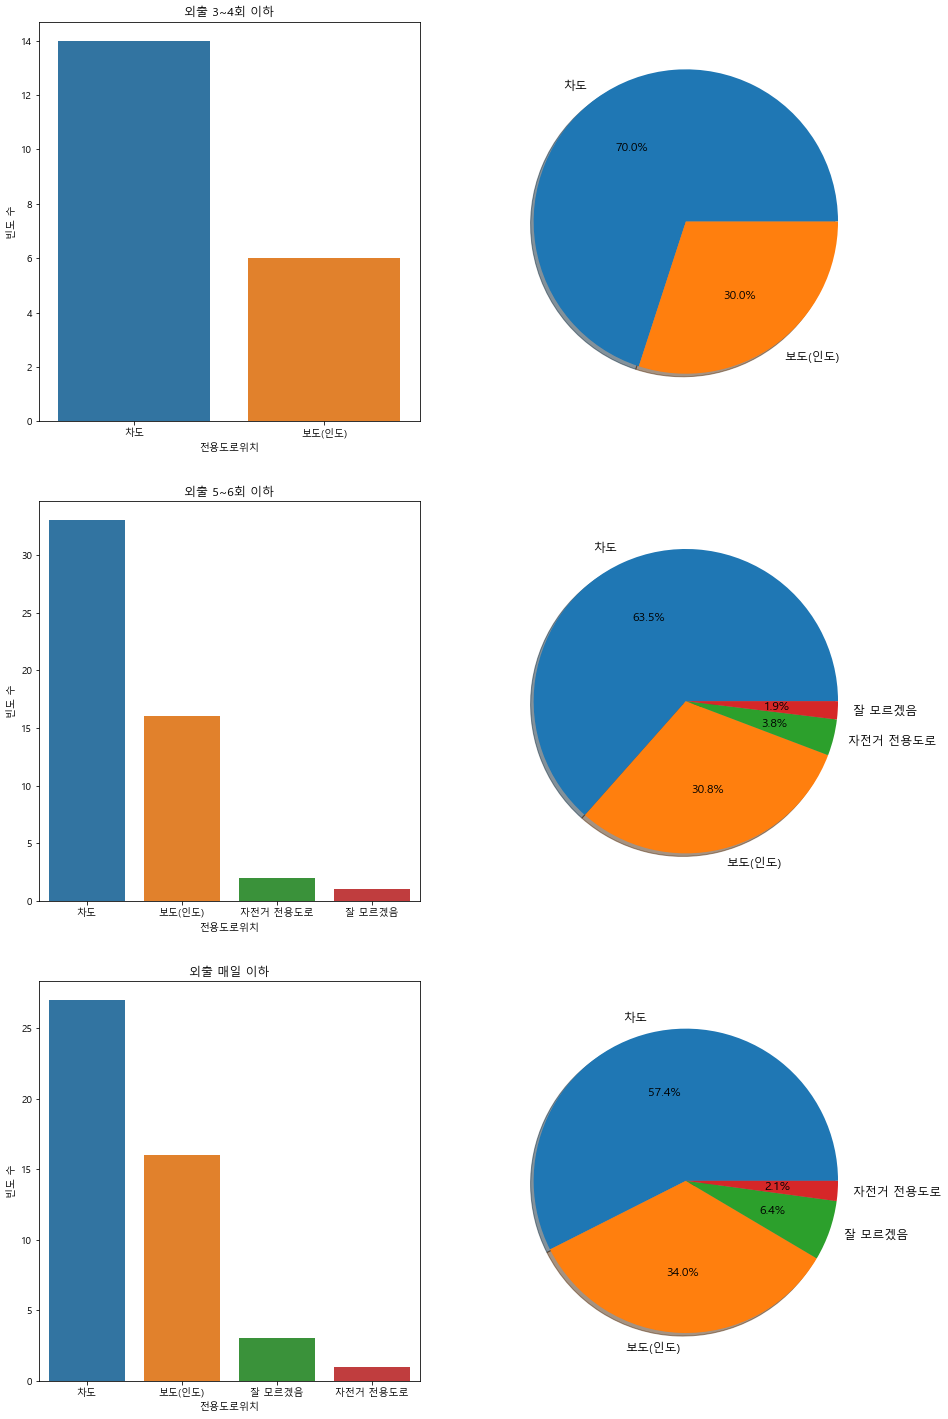

In [102]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(x = 외출34위치.index, y = '빈도 수', data = 외출34위치)
ax1 = plt.title('외출 3~4회 이하')

ax2= fig.add_subplot(3,2,2)
ax2 = plt.pie(외출34위치['비율'], labels = 외출34위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)

ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(x = 외출56위치.index, y = '빈도 수', data = 외출56위치)
ax3 = plt.title('외출 5~6회 이하')

ax4 = fig.add_subplot(3,2,4)
ax4 = plt.pie(외출56위치['비율'], labels = 외출56위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)

ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(x = 외출매일위치.index, y = '빈도 수', data = 외출매일위치)
ax5 = plt.title('외출 매일 이하')

ax6 = fig.add_subplot(3,2,6)
ax6 = plt.pie(외출매일위치['비율'], labels = 외출매일위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)

* 외출을 3~4회 이하로 한다고 응답한 보행자 중 70.0%는 전용도로가 차도에 설치되어야 한다고 응답하였음. 
* 외출을 5~6회 한다고 응답한 보행자 중 62.3%는 전용도로가 차도에 설치되어야 한다고 응답하였음. 
* 외출을 매일 한다고 응답한 보행자 중 58.0%는 전용도로가 차도에 설치되어야 한다고 응답하였음. 

#### 보행자 외출시간별 - 사고 교차분석

In [103]:
df_보행자['보행시간'].value_counts()

20~40분 미만     55
1시간 이상        28
40~60분 미만     24
0 ~ 20분 미만    12
Name: 보행시간, dtype: int64

In [104]:
보행20분 = df_보행자.loc[df_보행자['보행시간'] == '0 ~ 20분 미만']
보행40분 = df_보행자.loc[df_보행자['보행시간'] == '20~40분 미만']
보행60분 = df_보행자.loc[df_보행자['보행시간'] == '40~60분 미만']
보행1시간이상 = df_보행자.loc[df_보행자['보행시간'] == '1시간 이상']

In [105]:
보행20분사고 = pd.DataFrame(보행20분.groupby('pm사고경험')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행20분사고['비율'] = 보행20분사고['빈도 수'] / sum(보행20분사고['빈도 수']) * 100 

보행40분사고 = pd.DataFrame(보행40분.groupby('pm사고경험')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행40분사고['비율'] = 보행40분사고['빈도 수'] / sum(보행40분사고['빈도 수']) * 100

보행60분사고 = pd.DataFrame(보행60분.groupby('pm사고경험')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행60분사고['비율'] = 보행60분사고['빈도 수'] / sum(보행60분사고['빈도 수']) * 100

보행1시간이상사고 = pd.DataFrame(보행1시간이상.groupby('pm사고경험')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행1시간이상사고['비율'] = 보행1시간이상사고['빈도 수'] / sum(보행1시간이상사고['빈도 수']) * 100

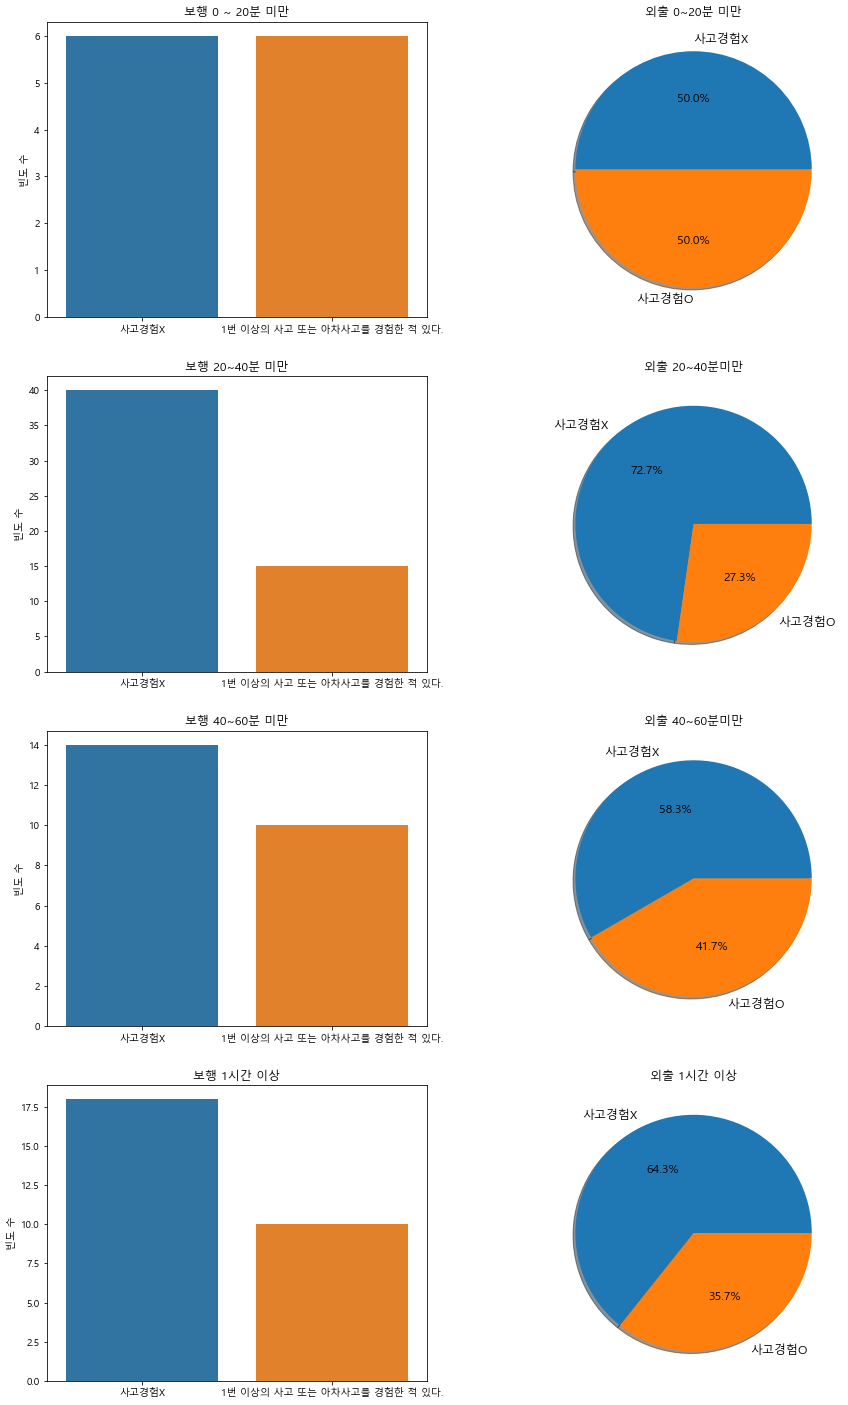

In [106]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번 이상의 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 보행20분사고)
ax1 = plt.title('보행 0 ~ 20분 미만')

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(보행20분사고['비율'], labels = ['사고경험X', '사고경험O'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)
ax2 = plt.title('외출 0~20분 미만')

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = ['사고경험X', '1번 이상의 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 보행40분사고)
ax3 = plt.title('보행 20~40분 미만')

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(보행40분사고['비율'], labels = ['사고경험X', '사고경험O'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)
ax4 = plt.title('외출 20~40분미만')

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = ['사고경험X', '1번 이상의 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 보행60분사고)
ax5 = plt.title('보행 40~60분 미만')

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(보행60분사고['비율'], labels = ['사고경험X', '사고경험O'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)
ax6 = plt.title('외출 40~60분미만')

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = ['사고경험X', '1번 이상의 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 보행1시간이상사고)
ax7 = plt.title('보행 1시간 이상')

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(보행1시간이상사고['비율'], labels = ['사고경험X', '사고경험O'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True)
ax8 = plt.title('외출 1시간 이상')

##### 외출시간별 사고경험 비율
* 외출을 0~20분미만으로 한다고 응답한 보행자 중 50.0% 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.
* 외출을 20~40분미만으로 한다고 응답한 보행자 중 27.3% 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.
* 외출을 40~60분미만으로 한다고 응답한 보행자 중 44.0% 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.
* 외출을 1시간이상으로 한다고 응답한 보행자 중 45.2% 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.

#### 보행자 외출시간별 전용도로찬/반 교차분석

In [107]:
보행20분찬반 = pd.DataFrame(보행20분.groupby('PM전용도로찬/반')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행20분찬반['비율'] = 보행20분찬반['빈도 수'] / sum(보행20분찬반['빈도 수']) * 100 

보행40분찬반 = pd.DataFrame(보행40분.groupby('PM전용도로찬/반')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행40분찬반['비율'] = 보행40분찬반['빈도 수'] / sum(보행40분찬반['빈도 수']) * 100 

보행60분찬반 = pd.DataFrame(보행60분.groupby('PM전용도로찬/반')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행60분찬반['비율'] = 보행60분찬반['빈도 수'] / sum(보행60분찬반['빈도 수']) * 100 

보행1시간이상찬반 = pd.DataFrame(보행1시간이상.groupby('PM전용도로찬/반')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행1시간이상찬반['비율'] = 보행1시간이상찬반['빈도 수'] / sum(보행1시간이상찬반['빈도 수']) * 100 

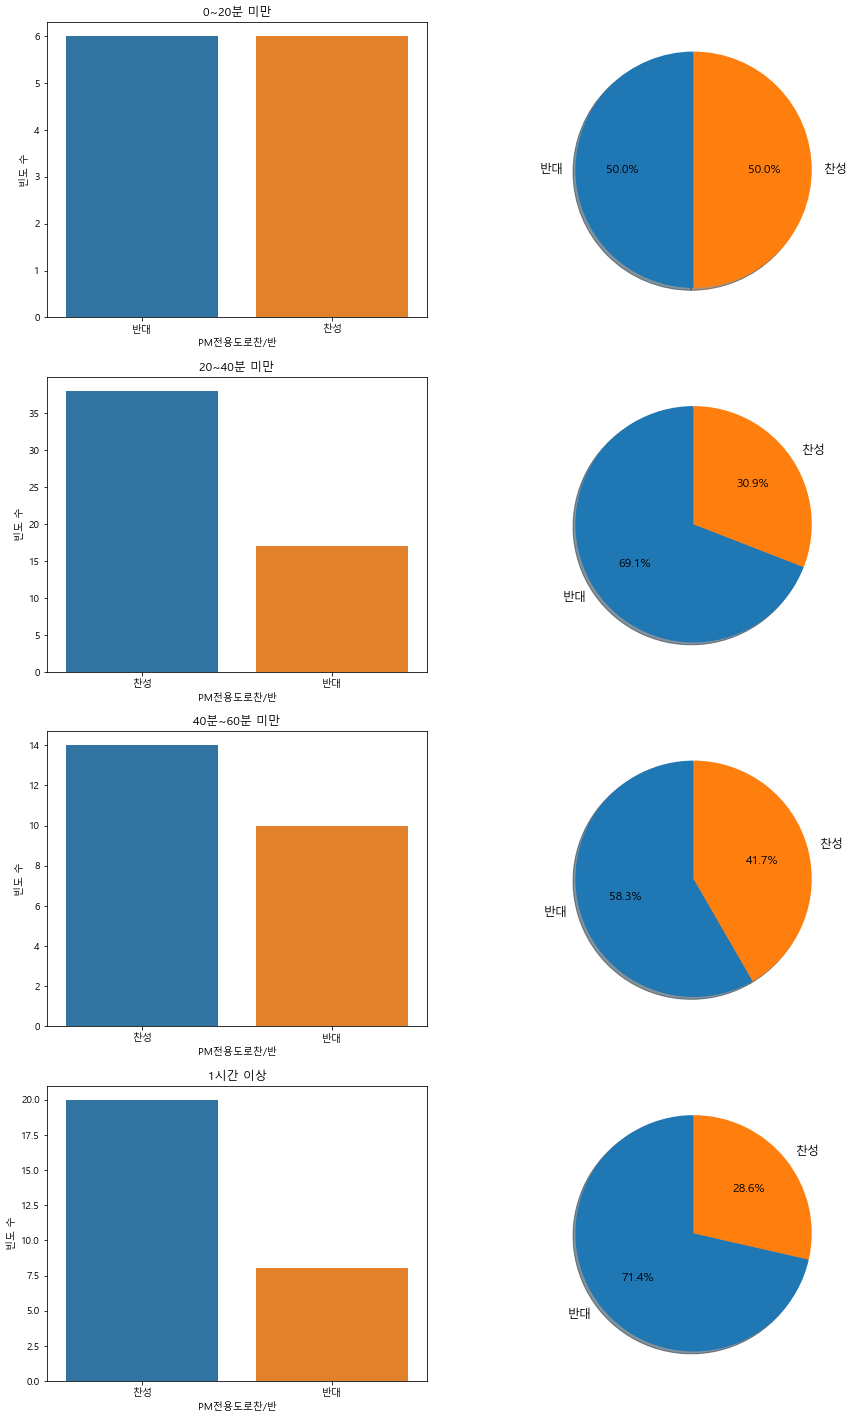

In [108]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x=보행20분찬반.index, y='빈도 수', data = 보행20분찬반)
ax1 = plt.title('0~20분 미만')

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(보행20분찬반['비율'], labels = ['반대', '찬성'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x=보행40분찬반.index, y='빈도 수', data = 보행40분찬반)
ax3 = plt.title('20~40분 미만')

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(보행40분찬반['비율'], labels = ['반대', '찬성'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x=보행60분찬반.index, y='빈도 수', data = 보행60분찬반)
ax5 = plt.title('40분~60분 미만')

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(보행60분찬반['비율'], labels = ['반대', '찬성'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x=보행1시간이상찬반.index, y='빈도 수', data = 보행1시간이상찬반)
ax7 = plt.title('1시간 이상')

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(보행1시간이상찬반['비율'], labels = ['반대', '찬성'],
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

* 외출을 0~20분미만으로 한다고 응답한 보행자 중 50.0% 가 전용도로의 필요성에 대해 찬성한다고 응답하였음
* 외출을 20~40분미만으로 한다고 응답한 보행자 중 69.1% 가 전용도로의 필요성에 대해 찬성한다고 응답하였음
* 외출을 40~60분미만으로 한다고 응답한 보행자 중 56.0% 가 전용도로의 필요성에 대해 찬성한다고 응답하였음
* 외출을 1시간이상으로 한다고 응답한 보행자 중 67.7% 가 전용도로의 필요성에 대해 찬성한다고 응답하였음

####  보행자 외출시간 - PM전용도로 설치위치 교차분석

In [109]:
보행20분위치 = pd.DataFrame(보행20분.groupby('전용도로위치')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행20분위치['비율'] = 보행20분위치['빈도 수'] / sum(보행20분위치['빈도 수']) * 100

보행40분위치 = pd.DataFrame(보행40분.groupby('전용도로위치')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행40분위치['비율'] = 보행40분위치['빈도 수'] / sum(보행40분위치['빈도 수']) * 100

보행60분위치 = pd.DataFrame(보행60분.groupby('전용도로위치')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행60분위치['비율'] = 보행60분위치['빈도 수'] / sum(보행60분위치['빈도 수']) * 100

보행1시간이상위치 = pd.DataFrame(보행1시간이상.groupby('전용도로위치')['빈도 수'].sum()).sort_values(by='빈도 수', ascending=False)
보행1시간이상위치['비율'] = 보행1시간이상위치['빈도 수'] / sum(보행1시간이상위치['빈도 수']) * 100

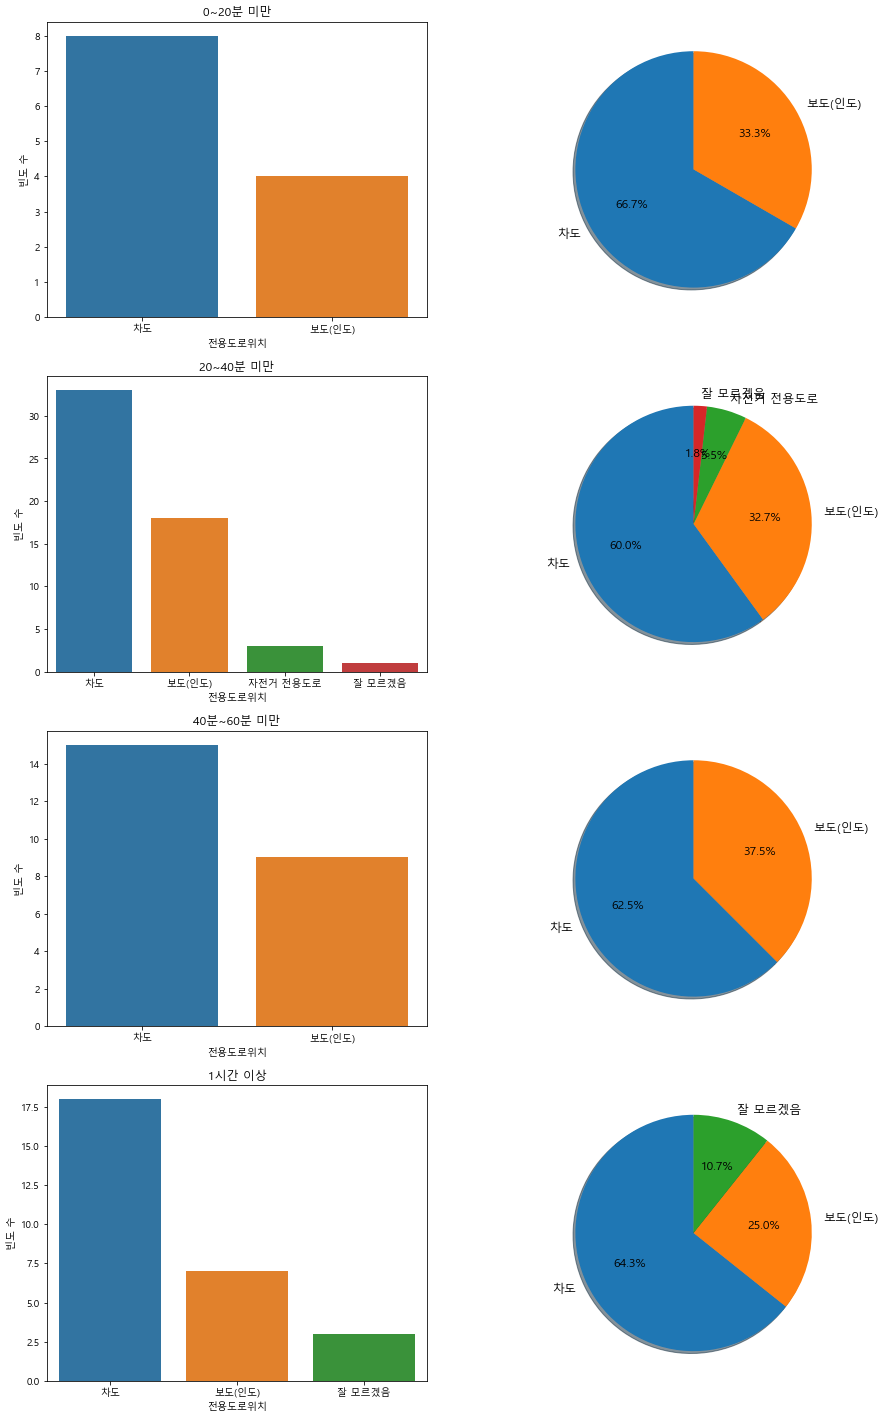

In [110]:
fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(data = 보행20분위치, x=보행20분위치.index, y='빈도 수')
ax1 = plt.title('0~20분 미만')

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(보행20분위치['비율'],  labels = 보행20분위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(data = 보행40분위치, x=보행40분위치.index, y='빈도 수')
ax3 = plt.title('20~40분 미만')

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(보행40분위치['비율'],  labels = 보행40분위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(data = 보행60분위치, x=보행60분위치.index, y='빈도 수')
ax5 = plt.title('40분~60분 미만')

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(보행60분위치['비율'],  labels = 보행60분위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(data = 보행1시간이상위치, x=보행1시간이상위치.index, y='빈도 수')
ax7 = plt.title('1시간 이상')

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(보행1시간이상위치['비율'],  labels = 보행1시간이상위치.index,
             autopct="%1.1f%%", textprops={'fontsize': 12}, 
             shadow = True, startangle=90)

* 외출을 0~20분미만으로 한다고 응답한 보행자 중 66.7% 가 전용도로를 차도에 설치해야한다고 응답하였음.
* 외출을 20~40분미만으로 한다고 응답한 보행자 중 60.0% 가 전용도로를 차도에 설치해야한다고 응답하였음.
* 외출을 40~60분미만으로 한다고 응답한 보행자 중 64.0% 가 전용도로를 차도에 설치해야한다고 응답하였음.
* 외출을 1시간이상으로 한다고 응답한 보행자 중 61.3% 가 전용도로를 차도에 설치해야한다고 응답하였음.